In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Census 2011

## Clean 1

In [6]:
df = pd.read_csv('/Users/sid/Downloads/category-wise-workers.csv')
census2 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/census2011/census2011.csv',encoding='ISO-8859-1')
rj = pd.read_csv('/Users/sid/Downloads/DCHB_RJ_Village.csv')
census = pd.concat([census2, pd.DataFrame(rj.values, columns=census2.columns)], axis=0, ignore_index=True)
census

,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,village_code,village_name,cd_block_code,cd_block_name,gram_panchayat_code,gram_panchayat_name,reference_year,sub_district_head_quarter__name_,sub_district_head_quarter__distance_in_km_,district_head_quarter__name_,district_head_quarter__distance_in_km_,nearest_statutory_town__name_,nearest_statutory_town__distance_in_km_,within_the_state_ut__name_,within_the_state_ut__distance_in_km_,outside_the_state_ut__if_nearest_one_is_not_within_the_state_ut__name_,outside_the_state_ut_distance__if_nearest_one_is_not_within_the_state_ut__distance_in_km_,total_geographical_area__in_hectares_,total__households,total_population_of_village,total_male_population_of_village,total_female_population_of_village,total_scheduled_castes_population_of_village,total_scheduled_castes_male_population_of_village,total_scheduled_castes_female_population_of_village,total_scheduled_tribes_population_of_village,total_scheduled_tribes_male_population_of_village,total_scheduled_tribes_female_population_of_village,govt_pre_primary_school__nursery_lkg_ukg___status_a_1__na_2__,govt_pre_primary_school__nursery_lkg_ukg___numbers_,private_pre_primary_school__nursery_lkg_ukg___status_a_1__na_2__,private_pre_primary_school__nursery_lkg_ukg___numbers_,nearest_facility_status__pre_primary_school__nursery_lkg_ukg___govt_1__private_2__,nearest_village_town_name__pre_primary_school__nursery_lkg_ukg_,_if_pre_primary_school__nursery_lkg_ukg_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_for___5_kms__b_for_5_10_kms_and_c_for_10__kms___,govt_primary_school__status_a_1__na_2__,govt_primary_school__numbers_,private_primary_school__status_a_1__na_2__,private_primary_school__numbers_,nearest_facility_status__primary_school___govt_1__private_2__,nearest_village_town_name__primary_school_,_if_primary_school_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_for___5_kms__b_for_5_10_kms_and_c_for_10__kms___,govt_middle_school__status_a_1__na_2__,govt_middle_school__numbers_,private_middle_school__status_a_1__na_2__,private_middle_school__numbers_,nearest_facility_status__middle_school___govt_1__private_2__,nearest_village_town_name__middle_school_,_if_middle_school_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_for___5_kms__b_for_5_10_kms_and_c_for_10__kms___,govt_secondary_school__status_a_1__na_2__,govt_secondary_school__numbers_,private_secondary_school__status_a_1__na_2__,private_secondary_school__numbers_,nearest_facility_status__secondary_school__govt_1__private_2__,nearest_village_town_name__secondary_school_,_if_secondary_school_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_for___5_kms__b_for_5_10_kms_and_c_for_10__kms___,govt_senior_secondary_school__status_a_1__na_2__,govt_senior_secondary_school__numbers_,private_senior_secondary_school__status_a_1__na_2__,private_senior_secondary_school__numbers_,nearest_facility_status__senior_secondary_school___govt_1__private_2__,nearest_village_town_name__senior_secondary_school_,_if_senior_secondary_school_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_for___5_kms__b_for_5_10_kms_and_c_for_10__kms___,govt_arts_and_science_degree_college__status_a_1__na_2__,govt_arts_and_science_degree_college__numbers_,private_arts_and_science_degree_college__status_a_1__na_2__,private_arts_and_science_degree_college__numbers_,nearest_facility_status__arts_and_science_degree_college___govt_1__private_2__,nearest_village_town_name__arts_and_science_degree_college_,_if_arts_and_science_degree_college_not_available_within_the_village__the_distance_range_code_of_nearest_place_where_facility_is_available_is_given_viz__a_f

In [7]:
# census.columns
column_names = census.columns.tolist()
column_names

['state_code',
 'state_name',
 'district_code',
 'district_name',
 'sub_district_code',
 'sub_district_name',
 'village_code',
 'village_name',
 'cd_block_code',
 'cd_block_name',
 'gram_panchayat_code',
 'gram_panchayat_name',
 'reference_year',
 'sub_district_head_quarter__name_',
 'sub_district_head_quarter__distance_in_km_',
 'district_head_quarter__name_',
 'district_head_quarter__distance_in_km_',
 'nearest_statutory_town__name_',
 'nearest_statutory_town__distance_in_km_',
 'within_the_state_ut__name_',
 'within_the_state_ut__distance_in_km_',
 'outside_the_state_ut__if_nearest_one_is_not_within_the_state_ut__name_',
 'outside_the_state_ut_distance__if_nearest_one_is_not_within_the_state_ut__distance_in_km_',
 'total_geographical_area__in_hectares_',
 'total__households',
 'total_population_of_village',
 'total_male_population_of_village',
 'total_female_population_of_village',
 'total_scheduled_castes_population_of_village',
 'total_scheduled_castes_male_population_of_village',

In [8]:
cen2 = census[['state_code',
 'state_name',
 'district_code',
 'district_name',
 'sub_district_code',
 'sub_district_name',
 'village_code',
 'village_name',
 'gram_panchayat_code',
 'gram_panchayat_name',
 'total_geographical_area__in_hectares_',
 'total__households',
 'total_population_of_village',
 'total_male_population_of_village',
 'total_female_population_of_village',
 'total_scheduled_castes_population_of_village',
 'total_scheduled_tribes_population_of_village',
 'govt_primary_school__status_a_1__na_2__',
 'govt_middle_school__status_a_1__na_2__',
 'govt_secondary_school__status_a_1__na_2__',
 'govt_senior_secondary_school__status_a_1__na_2__',
 'govt_arts_and_science_degree_college__status_a_1__na_2__',
 'govt_polytechnic__status_a_1__na_2__',
 'govt_vocational_training_school_iti__status_a_1__na_2__',
 'community_health_centre__numbers_',
 'primary_health_centre__numbers_',
 'primary_health_sub_centre__numbers_',
 'maternity_and_child_welfare_centre__numbers_',
 'dispensary__numbers_',
 'veterinary_hospital__numbers_',
 'post_office__status_a_1__na_2__',
 'sub_post_office__status_a_1__na_2__',
 'public_bus_service__status_a_1__na_2__',
 'railway_station__status_a_1__na_2__',
 'auto_modified_autos__status_a_1__na_2__',
 'vans__status_a_1__na_2__',
 'national_highway__status_a_1__na_2__',
 'state_highway__status_a_1__na_2__',
 'major_district_road__status_a_1__na_2__',
 'other_district_road__status_a_1__na_2__',
 'all_weather_road__status_a_1__na_2__',
 'commercial_bank__status_a_1__na_2__',
 'cooperative_bank__status_a_1__na_2__',
 'public_distribution_system__pds__shop__status_a_1__na_2__',
 'mandis_regular_market__status_a_1__na_2__',
 'nutritional_centres_icds__status_a_1__na_2__',
 'nutritional_centres_anganwadi_centre__status_a_1__na_2__',
 'asha__status_a_1__na_2__',
 'nearest_town_name',
 'nearest_town_distance_from_village__in_km__'
 ]]

In [9]:
cen2['govt_primary_school__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_primary_school__status_a_1__na_2__'], errors='coerce')
cen2['govt_middle_school__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_middle_school__status_a_1__na_2__'], errors='coerce')
cen2['govt_secondary_school__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_secondary_school__status_a_1__na_2__'], errors='coerce')
cen2['govt_senior_secondary_school__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_senior_secondary_school__status_a_1__na_2__'], errors='coerce')
cen2['govt_arts_and_science_degree_college__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_arts_and_science_degree_college__status_a_1__na_2__'], errors='coerce')
cen2['govt_polytechnic__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_polytechnic__status_a_1__na_2__'], errors='coerce')
cen2['govt_vocational_training_school_iti__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_vocational_training_school_iti__status_a_1__na_2__'], errors='coerce')
cen2['govt_vocational_training_school_iti__status_a_1__na_2__'] = pd.to_numeric(cen2['govt_vocational_training_school_iti__status_a_1__na_2__'], errors='coerce')
# cen2 = cen2.dropna(subset=['govt_primary_school__status_a_1__na_2__'])

In [10]:
cen3 = cen2.copy()
# Columns to apply the transformation
columns_to_recode1 = [
                        'govt_primary_school__status_a_1__na_2__',
                        'govt_middle_school__status_a_1__na_2__',
                        'govt_secondary_school__status_a_1__na_2__',
                        'govt_senior_secondary_school__status_a_1__na_2__',
                        'govt_arts_and_science_degree_college__status_a_1__na_2__',
                        'govt_polytechnic__status_a_1__na_2__',
                        'govt_vocational_training_school_iti__status_a_1__na_2__',
                        'post_office__status_a_1__na_2__',
                        'sub_post_office__status_a_1__na_2__',
                        'public_bus_service__status_a_1__na_2__',
                        'railway_station__status_a_1__na_2__',
                        'auto_modified_autos__status_a_1__na_2__',
                        'vans__status_a_1__na_2__',
                        'national_highway__status_a_1__na_2__',
                        'state_highway__status_a_1__na_2__',
                        'major_district_road__status_a_1__na_2__',
                        'other_district_road__status_a_1__na_2__',
                        'all_weather_road__status_a_1__na_2__',
                        'commercial_bank__status_a_1__na_2__',
                        'cooperative_bank__status_a_1__na_2__',
                        'public_distribution_system__pds__shop__status_a_1__na_2__',
                        'mandis_regular_market__status_a_1__na_2__',
                        'nutritional_centres_icds__status_a_1__na_2__',
                        'nutritional_centres_anganwadi_centre__status_a_1__na_2__',
                        'asha__status_a_1__na_2__',    
                        ]

columns_to_recode2 = [
                        'community_health_centre__numbers_',
                        'primary_health_centre__numbers_',
                        'primary_health_sub_centre__numbers_',
                        'maternity_and_child_welfare_centre__numbers_',
                        'dispensary__numbers_',
                        'veterinary_hospital__numbers_',
]

# Define the transformation function
def transform_value(x):
    if x > 1:
        return 1
    return x

def recode_value(value, threshold):
    if value >= threshold:
        return 0
    else:
        return 1
    
# Apply the recode function to the specified columns (Set 4)
for col in columns_to_recode1:
    cen3[col] = cen3[col].apply(lambda x: recode_value(x, 2))  # Recode 1.5 or above as 0, else 1

# Apply the transformation to the specified columns
cen3[columns_to_recode2] = cen3[columns_to_recode2].applymap(transform_value)


# cen3 = cen3.replace("'", "", regex=True)
cen3 = cen3.applymap(lambda x: x.replace("'", "").strip() if isinstance(x, str) else x)

In [11]:

cen3['state_code'] = pd.to_numeric(cen3['state_code'], errors='coerce')
cen3['district_code'] = pd.to_numeric(cen3['district_code'], errors='coerce')
cen3['sub_district_code'] = pd.to_numeric(cen3['sub_district_code'], errors='coerce')
cen3['village_code'] = pd.to_numeric(cen3['village_code'], errors='coerce')
cen3['gram_panchayat_code'] = pd.to_numeric(cen3['gram_panchayat_code'], errors='coerce')

cen3 = cen3.dropna(subset=['village_code'])
cen3


,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,village_code,village_name,gram_panchayat_code,gram_panchayat_name,total_geographical_area__in_hectares_,total__households,total_population_of_village,total_male_population_of_village,total_female_population_of_village,total_scheduled_castes_population_of_village,total_scheduled_tribes_population_of_village,govt_primary_school__status_a_1__na_2__,govt_middle_school__status_a_1__na_2__,govt_secondary_school__status_a_1__na_2__,govt_senior_secondary_school__status_a_1__na_2__,govt_arts_and_science_degree_college__status_a_1__na_2__,govt_polytechnic__status_a_1__na_2__,govt_vocational_training_school_iti__status_a_1__na_2__,community_health_centre__numbers_,primary_health_centre__numbers_,primary_health_sub_centre__numbers_,maternity_and_child_welfare_centre__numbers_,dispensary__numbers_,veterinary_hospital__numbers_,post_office__status_a_1__na_2__,sub_post_office__status_a_1__na_2__,public_bus_service__status_a_1__na_2__,railway_station__status_a_1__na_2__,auto_modified_autos__status_a_1__na_2__,vans__status_a_1__na_2__,national_highway__status_a_1__na_2__,state_highway__status_a_1__na_2__,major_district_road__status_a_1__na_2__,other_district_road__status_a_1__na_2__,all_weather_road__status_a_1__na_2__,commercial_bank__status_a_1__na_2__,cooperative_bank__status_a_1__na_2__,public_distribution_system__pds__shop__status_a_1__na_2__,mandis_regular_market__status_a_1__na_2__,nutritional_centres_icds__status_a_1__na_2__,nutritional_centres_anganwadi_centre__status_a_1__na_2__,asha__status_a_1__na_2__,nearest_town_name,nearest_town_distance_from_village__in_km__
0,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568945.0,Karanji (T),NaN,KARANJI (T),338.00,504.0,2232,1104.0,1128.0,258.0,795.0,1,1,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,ADILABAD,52.0
1,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568946.0,Guledi,NaN,GOMUTRI,741.00,117.0,509,254.0,255.0,18.0,117.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,51.0
2,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568947.0,Gomutri,NaN,GOMUTRI,1104.00,247.0,1102,551.0,551.0,78.0,348.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,40.0
3,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568948.0,Antargaon,NaN,ANTARGAON,581.00,208.0,875,445.0,430.0,96.0,129.0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,37.0
4,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568949.0,Arli (T),NaN,ARLI (T),3183.00,614.0,2833,1428.0,1405.0,148.0,1073.0,1,1,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,ADILABAD,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554166,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108879.0,Ambeerama,NaN,NaN,1342.05,272.0,1472,728.0,744.0,64.0,1282.0,1,1,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,JALOR,30.0
554167,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108880.0,Thikriya,NaN,NaN,118.31,147.0,747,378.0,369.0,0.0,747.0,1,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,30.0
554168,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108881.0,Andhariya Badla,NaN,NaN,129.64,82.0,383,202.0,181.0,0.0,383.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,30.0
554169,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108882.0,Mothiya,NaN,NaN,735.35,139.0,701,351.0,350.0,0.0,293.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,30.0


In [12]:
cen4 = cen3.rename(columns={'total_geographical_area__in_hectares_': 'cen11_area', 'total_population_of_village':'population',
                            'total_male_population_of_village':'male_pop','total_female_population_of_village':'female_pop',
                                  'total_scheduled_castes_population_of_village':'sc_pop','total_scheduled_tribes_population_of_village':'st_pop',
                                  'govt_primary_school__status_a_1__na_2__':'p_school','govt_middle_school__status_a_1__na_2__':'m_school',
                                  'govt_secondary_school__status_a_1__na_2__':'h_school','govt_senior_secondary_school__status_a_1__na_2__':'ssc_school',
                                  'govt_arts_and_science_degree_college__status_a_1__na_2__':'arts_and_science_degree_college','govt_polytechnic__status_a_1__na_2__':'polytechnic',
                                  'govt_vocational_training_school_iti__status_a_1__na_2__':'iti','community_health_centre__numbers_':'chc',
                                  'primary_health_centre__numbers_':'phc','primary_health_sub_centre__numbers_':'phc_subcentre',
                                  'maternity_and_child_welfare_centre__numbers_':'mcwc','dispensary__numbers_':'dispensary',
                                  'veterinary_hospital__numbers_':'veterinary_hospital','post_office__status_a_1__na_2__':'post_office',
                                  'sub_post_office__status_a_1__na_2__':'subpost_office','public_bus_service__status_a_1__na_2__':'bus',
                                  'railway_station__status_a_1__na_2__':'railway','auto_modified_autos__status_a_1__na_2__':'auto',
                                  'vans__status_a_1__na_2__':'vans','national_highway__status_a_1__na_2__':'national_highway',
                                  'state_highway__status_a_1__na_2__':'state_highway','major_district_road__status_a_1__na_2__':'MDR',
                                  'other_district_road__status_a_1__na_2__':'ODR','all_weather_road__status_a_1__na_2__':'all_weather_road',
                                  'commercial_bank__status_a_1__na_2__':'commercial_bank','cooperative_bank__status_a_1__na_2__':'cooperative_bank',
                                  'public_distribution_system__pds__shop__status_a_1__na_2__':'pds','mandis_regular_market__status_a_1__na_2__':'mandis',
                                  'nutritional_centres_icds__status_a_1__na_2__':'icds','nutritional_centres_anganwadi_centre__status_a_1__na_2__':'aanganwadi',
                                  'asha__status_a_1__na_2__':'asha','nearest_town_distance_from_village__in_km__':'nearest_town_distance'
                                  })

In [13]:
# Define a dictionary to map text values to numbers
replace_dict = {'a': 5, 'b': 10, 'c': 20}

# Replace the text values
cen4['nearest_town_distance'] = cen4['nearest_town_distance'].replace(replace_dict)

# Convert the column to numeric, forcing any remaining non-numeric values to NaN
cen4['nearest_town_distance'] = pd.to_numeric(cen4['nearest_town_distance'], errors='coerce')

In [14]:
summary_stats = cen4.describe()
summary_stats

,state_code,district_code,sub_district_code,village_code,gram_panchayat_code,cen11_area,total__households,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,post_office,subpost_office,bus,railway,auto,vans,national_highway,state_highway,MDR,ODR,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,icds,aanganwadi,asha,nearest_town_distance
count,554170.000000,554170.000000,554170.000000,554170.000000,165052.000000,554153.000000,522388.000000,554170.000000,522388.000000,522388.000000,522388.000000,522388.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,516206.000000,516409.000000,516056.000000,515893.000000,515234.000000,515795.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,462100.000000
mean,17.208941,321.192621,2433.919166,330383.278595,428.624482,409.252894,290.924271,1357.519922,739.184650,700.944459,273.812075,149.933823,0.837900,0.456762,0.207586,0.119981,0.070401,0.065763,0.068593,0.007861,0.038733,0.186579,0.062701,0.037449,0.052676,0.157434,0.221037,0.341088,0.088139,0.280999,0.283637,0.119364,0.200785,0.320214,0.571370,0.698968,0.114878,0.112189,0.581497,0.183005,0.521571,0.829071,0.835332,24.055650
std,8.028577,158.381380,1584.401092,178041.463954,2717.880351,941.446250,423.637531,1961.484941,1019.214224,974.090947,480.236445,393.032198,0.368543,0.498127,0.405579,0.324940,0.255821,0.247868,0.252760,0.088314,0.192958,0.389573,0.242425,0.189860,0.223386,0.364209,0.414946,0.474075,0.283497,0.449487,0.450763,0.324217,0.400588,0.466559,0.494881,0.458707,0.318875,0.315600,0.493314,0.386671,0.499535,0.376448,0.370881,53.702947
min,3.000000,35.000000,200.000000,27374.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,179.000000,918.000000,171001.250000,8.000000,97.770000,80.000000,325.000000,203.000000,196.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,19.000000,343.000000,2430.000000,334814.500000,20.000000,220.180000,174.000000,804.000000,447.000000,427.000000,108.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,18.000000
75%,23.000000,442.000000,3566.000000,479705.750000,117.000000,468.100000,346.000000,1669.000000,897.000000,850.000000,351.000000,130.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,31.000000
max,35.000000,640.000000,5924.000000,645608.000000,518473.000000,373187.000000,15595.000000,66062.000000,34739.000000,31829.000000,32621.000000,36026.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [15]:
state_stats = cen4.groupby('state_name').mean()
state_stats

,state_code,district_code,sub_district_code,village_code,gram_panchayat_code,cen11_area,total__households,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,post_office,subpost_office,bus,railway,auto,vans,national_highway,state_highway,MDR,ODR,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,icds,aanganwadi,asha,nearest_town_distance
state_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,35.0,638.870270,5919.636036,645289.392793,15.000000,146.906649,147.803030,427.194595,318.906566,279.813131,0.000000,67.462121,0.688288,0.488288,0.407207,0.354955,0.290090,0.290090,0.293694,0.012887,0.043814,0.273196,0.043928,0.057047,0.073826,0.482883,0.556757,0.769369,0.463063,0.666667,0.634234,0.612613,0.616216,0.684685,0.711712,0.722523,0.499099,0.504505,0.673874,0.578378,0.637838,0.814414,0.816216,164.802899
ANDHRA PRADESH,28.0,542.348028,4806.759058,582167.566834,NaN,872.928436,583.141595,2196.667297,1161.258176,1157.476659,444.393679,195.741325,0.974269,0.599801,0.353987,0.087740,0.060165,0.053968,0.056428,0.006790,0.064610,0.415498,0.000000,0.017425,0.154027,0.193501,0.429950,0.742645,0.069577,0.775423,0.214738,0.100937,0.161763,0.341737,0.805648,0.999905,0.148047,0.099186,0.825892,0.180588,0.688345,0.895138,0.778829,32.049294
ASSAM,18.0,312.543297,2077.857664,294021.693899,41.963746,191.250994,209.670587,987.574101,525.944479,504.526628,67.359728,143.259579,0.867132,0.394495,0.195123,0.074586,0.050847,0.042119,0.043458,0.004289,0.035182,0.118849,0.009784,0.012386,0.018411,0.062578,0.124879,0.340784,0.073662,0.350252,0.357780,0.151111,0.181314,0.397174,0.936129,0.658477,0.074262,0.053480,0.561954,0.196139,0.297788,0.821087,0.641943,22.055141
BIHAR,10.0,222.692516,1307.829595,238462.991902,1298.787912,202.978482,427.926056,2057.519859,1221.760233,1125.785071,390.844922,32.964365,0.856074,0.553276,0.224955,0.156870,0.132939,0.126069,0.126501,0.001012,0.033144,0.214514,0.122946,0.037323,0.020634,0.339217,0.146178,0.248772,0.168699,0.382894,0.357507,0.192220,0.285077,0.438194,0.550159,0.731642,0.187443,0.170041,0.550591,0.361874,0.134645,0.870883,0.810419,21.461379
CHHATTISGARH,22.0,407.784244,3306.844486,441025.463783,NaN,458.705193,225.864167,987.500248,507.670599,507.552688,139.195554,342.814201,0.960556,0.557070,0.147791,0.090859,0.031776,0.027638,0.029790,0.002439,0.034426,0.229015,0.042650,0.027734,0.041969,0.140564,0.110057,0.027362,0.034258,0.070999,0.160975,0.071606,0.138798,0.255144,0.483754,0.764440,0.046174,0.061952,0.485243,0.124290,0.223368,0.938876,0.913279,25.041502
GOA,30.0,585.419162,5614.047904,626839.017964,NaN,875.311677,400.650000,1651.889222,860.737500,863.421875,29.565625,273.871875,0.802395,0.287425,0.203593,0.041916,0.044910,0.044910,0.047904,0.000000,0.025000,0.381250,0.021875,0.062500,0.037500,0.122754,0.437126,0.781437,0.074850,0.245509,0.485030,0.152695,0.161677,0.583832,0.491018,0.631737,0.263473,0.146707,0.532934,0.122754,0.119760,0.736527,0.997006,NaN
GUJARAT,24.0,479.862348,3839.590375,515723.290257,161.474610,852.294342,388.385958,1936.658940,1018.377198,964.771916,134.587763,435.513006,0.973684,0.023443,0.206608,0.073332,0.026446,0.023573,0.029907,0.010030,0.063791,0.359545,0.034771,0.018589,0.030291,0.055374,0.416547,0.980475,0.048975,0.329241,0.248335,0.066018,0.303056,0.497715,0.812329,0.865417,0.111663,0.071699,0.627269,0.061447,0.027099,0.952592,0.830286,19.543504
HARYANA,6.0,78.429683,389.574916,60451.734477,54.982934,678.595613,493.532012,2605.732001,1424.560931,1254.632048,595.579302,0.000000,0.948877,0.713957,0.448258,0.250663,0.030603,0.028304,0.034141,0.008912,0.055111,0.353947,0.087850,0.085486,0.391415,0.152132,0.339643,0.944277,0.053954,0.426676,0.401734,0.125774,0.346188,0.550150,0.787546,1.000000,0.124713,0.140810,0.798160,0.133027,0.868919,0.981426,0.962498,0.263572
JHARKHAND,20.0,356.588597,2614.431407,363415.2288

## LGD Merge

In [16]:
lgd = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/census2011/LGD_villages.csv')
ntl12 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/census2011/2012.csv',low_memory=False)

In [24]:
summary_stats = cen4.describe()
summary_stats

,state_code,district_code,sub_district_code,village_code,gram_panchayat_code,cen11_area,total__households,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,post_office,subpost_office,bus,railway,auto,vans,national_highway,state_highway,MDR,ODR,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,icds,aanganwadi,asha,nearest_town_distance
count,554170.000000,554170.000000,554170.000000,554170.000000,165052.000000,554153.000000,522388.000000,554170.000000,522388.000000,522388.000000,522388.000000,522388.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,516206.000000,516409.000000,516056.000000,515893.000000,515234.000000,515795.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,554170.000000,462100.000000
mean,17.208941,321.192621,2433.919166,330383.278595,428.624482,409.252894,290.924271,1357.519922,739.184650,700.944459,273.812075,149.933823,0.837900,0.456762,0.207586,0.119981,0.070401,0.065763,0.068593,0.007861,0.038733,0.186579,0.062701,0.037449,0.052676,0.157434,0.221037,0.341088,0.088139,0.280999,0.283637,0.119364,0.200785,0.320214,0.571370,0.698968,0.114878,0.112189,0.581497,0.183005,0.521571,0.829071,0.835332,24.055650
std,8.028577,158.381380,1584.401092,178041.463954,2717.880351,941.446250,423.637531,1961.484941,1019.214224,974.090947,480.236445,393.032198,0.368543,0.498127,0.405579,0.324940,0.255821,0.247868,0.252760,0.088314,0.192958,0.389573,0.242425,0.189860,0.223386,0.364209,0.414946,0.474075,0.283497,0.449487,0.450763,0.324217,0.400588,0.466559,0.494881,0.458707,0.318875,0.315600,0.493314,0.386671,0.499535,0.376448,0.370881,53.702947
min,3.000000,35.000000,200.000000,27374.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,179.000000,918.000000,171001.250000,8.000000,97.770000,80.000000,325.000000,203.000000,196.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,19.000000,343.000000,2430.000000,334814.500000,20.000000,220.180000,174.000000,804.000000,447.000000,427.000000,108.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,18.000000
75%,23.000000,442.000000,3566.000000,479705.750000,117.000000,468.100000,346.000000,1669.000000,897.000000,850.000000,351.000000,130.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,31.000000
max,35.000000,640.000000,5924.000000,645608.000000,518473.000000,373187.000000,15595.000000,66062.000000,34739.000000,31829.000000,32621.000000,36026.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [17]:

summary_stats = ntl12.describe()
summary_stats

,stcode11,dtcode11,vilcode11,vil_code,dist_lgd,state_lgd,gpcode,subdt_lgd,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa
count,584615.000000,584615.000000,547078.000000,584615.000000,584615.000000,584615.000000,584615.000000,584615.000000,584615.000000,523975.000000,584615.000000,584615.000000,584615.000000,584615.000000,584615.000000
mean,18.176285,355.181692,348740.389367,326329.751284,335.682986,17.938392,118470.468023,2683.934379,3101.775931,122.260104,5.689729,828.990442,5.339962,24.066401,8.054830
std,8.886988,192.366437,188304.173046,201229.020946,184.827534,8.491468,74330.920719,1772.583452,1817.585507,96.996251,38.572800,1012.929984,12.590468,163.181402,66.346825
min,3.000000,35.000000,27374.000000,0.000000,27.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.121875,0.244827,0.010000,0.154461
25%,9.000000,186.000000,182303.500000,151167.500000,170.000000,9.000000,64461.500000,947.000000,1453.000000,43.000000,1.301576,382.542887,1.872747,4.520000,1.806776
50%,20.000000,357.000000,356341.500000,336913.000000,337.000000,20.000000,112089.000000,2587.000000,3191.000000,96.000000,2.838993,676.932367,3.107835,8.878571,3.130596
75%,23.000000,499.000000,509769.750000,498555.500000,472.000000,23.000000,169119.500000,3900.000000,4256.000000,188.000000,5.910148,1061.215130,5.459830,18.667858,5.886360
max,39.000000,825.000000,944881.000000,944881.000000,763.000000,38.000000,299662.000000,7327.000000,7711.000000,403.000000,24345.282942,30821.376810,642.521779,45835.040000,19453.259610


In [18]:
lum12 = pd.merge(cen4,ntl12,left_on='village_code',right_on='vilcode11',how='inner')
lum12

,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,village_code,village_name,gram_panchayat_code,gram_panchayat_name,cen11_area,total__households,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,post_office,subpost_office,bus,railway,auto,vans,national_highway,state_highway,MDR,ODR,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,icds,aanganwadi,asha,nearest_town_name,nearest_town_distance,Village,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa
0,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568945.0,Karanji (T),NaN,KARANJI (T),338.00,504.0,2232,1104.0,1128.0,258.0,795.0,1,1,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,ADILABAD,52.0,KARANJI,36,532,NaN,568945.0,TELANGANA,Adilabad,BHEEMPUR,Karanji (T),568945,501,36,195687,KARANJI (T),6223,Bheempur,7189,8.0,22.147866,222.803432,1.237580,19.455715,0.878446
1,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568946.0,Guledi,NaN,GOMUTRI,741.00,117.0,509,254.0,255.0,18.0,117.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,51.0,GUBIDI,36,532,NaN,568946.0,TELANGANA,Adilabad,BHEEMPUR,Guledi,568946,501,36,288862,Gubdi,6223,Bheempur,7189,8.0,8.616328,222.803432,1.237580,10.397142,1.206679
2,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568947.0,Gomutri,NaN,GOMUTRI,1104.00,247.0,1102,551.0,551.0,78.0,348.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,40.0,GOMUTRI,36,532,NaN,568947.0,TELANGANA,Adilabad,BHEEMPUR,Gomutri,568947,501,36,195683,GOMUTRI,6223,Bheempur,7189,8.0,12.704872,222.803432,1.237580,11.481429,0.903703
3,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568948.0,Antargaon,NaN,ANTARGAON,581.00,208.0,875,445.0,430.0,96.0,129.0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,ADILABAD,37.0,ANTARGAON,36,532,NaN,568948.0,TELANGANA,Adilabad,BHEEMPUR,Antargaon,568948,501,36,195675,ANTARGAON,6223,Bheempur,7189,8.0,6.287569,222.803432,1.237580,8.255713,1.313022
4,28.0,ANDHRA PRADESH,532.0,Adilabad,4305.0,Tamsi,568949.0,Arli (T),NaN,ARLI (T),3183.00,614.0,2833,1428.0,1405.0,148.0,1073.0,1,1,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,ADILABAD,32.0,ARLI TARAF,36,532,NaN,568949.0,TELANGANA,Adilabad,BHEEMPUR,Arli (T),568949,501,36,195676,ARLI (T),6223,Bheempur,7189,8.0,33.909260,222.803432,1.237580,30.801426,0.908349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498459,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108874.0,Ajanda,NaN,NaN,210.24,138.0,728,385.0,343.0,0.0,728.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,45.0,AAJANDA,8,131,00700,108874.0,RAJASTHAN,Pratapgarh,Arnod,Ajanda,108874,629,8,262185,Bhat Bhamriya,700,DALOT,7466,172.0,2.448718,786.360812,2.700496,6.937143,2.832969
498460,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108875.0,Bhat Bhamriya,NaN,NaN,618.32,277.0,1551,784.0,767.0,1.0,1540.0,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,JALOR,45.0,BHATBHAMRIYA,8,131,00700,108875.0,RAJASTHAN,Pratapgarh,Arnod,Bhat Bhamriya,108875,629,8,262185,Bhat Bhamriya,700,DALOT,7466,172.0,6.783740,786.360812,2.700496,17.815716,2.626238
498461,8.0,RAJASTHAN,131.0,Pratapgarh,700.0,Arnod,108878.0,Patariya,NaN,NaN,109.64,107.0,555,289.0,266.0,0.0,555.0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,JALOR,35.0,LUHARIKHARI,8,131,00700,108878.0,RAJASTHAN,Pratapgarh,Arnod,

In [19]:
lum12['ntl_pc']=lum12['avg_ntl']/lum12['population']
lum12=lum12.drop_duplicates(subset='village_code')
lum12_sorted = lum12.sort_values(by=['state','district', 'subdistrict','ntl_pc'])
lum12_sorted['Index'] = lum12_sorted.groupby(['state','district','subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
lum12_sorted['Max_Len'] = lum12_sorted.groupby(['state','district','subdistrict'])['Index'].transform('max')

lum12_sorted = lum12_sorted[lum12_sorted['population'] != 0]

lum12_sorted

,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,village_code,village_name,gram_panchayat_code,gram_panchayat_name,cen11_area,total__households,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,post_office,subpost_office,bus,railway,auto,vans,national_highway,state_highway,MDR,ODR,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,icds,aanganwadi,asha,nearest_town_name,nearest_town_distance,Village,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,subdist_ntl_pa,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len
269291,35.0,ANDAMAN & NICOBAR ISLANDS,638.0,Nicobars,5916.0,Car Nicobar,645017.0,Kakana,NaN,NaN,0.00,231.0,841,456.0,385.0,0.0,838.0,1,1,1,1,0,0,0,0.0,0.0,1.0,0.0,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,CAR NICOBAR,35,638,05916,645017.0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,Kakana,645017,603,35,259315,Kakana,5916,CAR NICOBAR,6499,NaN,135.035888,135.035888,1.317882,177.961430,1.317882,0.211607,1,1
269299,35.0,ANDAMAN & NICOBAR ISLANDS,638.0,Nicobars,5918.0,Great Nicobar,645140.0,Pulomilo,NaN,NaN,0.00,5.0,20,15.0,5.0,0.0,20.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,PULO MILO,35,638,05918,645140.0,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,Pulomilo,645140,603,35,259509,Pulomilo,5918,CAMPBELL BAY,6498,NaN,1.867272,1167.356958,0.244827,0.655714,0.351162,0.032786,1,2
269292,35.0,ANDAMAN & NICOBAR ISLANDS,638.0,Nicobars,5917.0,Nancowry,645032.0,Raihion,NaN,NaN,0.65,74.0,276,150.0,126.0,0.0,263.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,CHOWRA ISLAND,35,638,05917,645032.0,ANDAMAN & NICOBAR,Nicobars,Nancowry,Raihion,645032,603,35,259443,Raihion,5917,NANCOWRIE,6500,NaN,7.334854,518.303656,0.353599,6.925714,0.944220,0.025093,1,6
269293,35.0,ANDAMAN & NICOBAR ISLANDS,638.0,Nicobars,5917.0,Nancowry,645033.0,Tillang Chong Island*,NaN,NaN,0.00,4.0,38,38.0,0.0,0.0,5.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,TILLANCHANG,35,638,05917,645033.0,ANDAMAN & NICOBAR,Nicobars,Nancowry,Tillang Chong Island*,645033,603,35,259390,Tilang Chong Island,5917,NANCOWRIE,6500,NaN,16.012430,518.303656,0.353599,5.902857,0.368642,0.155338,2,6
269294,35.0,ANDAMAN & NICOBAR ISLANDS,638.0,Nicobars,5917.0,Nancowry,645037.0,Luxi,NaN,NaN,0.00,39.0,149,86.0,63.0,0.0,142.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,TARASA DW|P,35,638,05917,645037.0,ANDAMAN & NICOBAR,Nicobars,Nancowry,Luxi,645037,603,35,259430,Luxi,5917,NANCOWRIE,6500,NaN,95.496701,518.303656,0.353599,29.962856,0.313758,0.201093,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261772,19.0,West Bengal,340.0,Puruliya,2384.0,Santuri,330507.0,Kalaid,NaN,NaN,111.14,23.0,162,77.0,85.0,0.0,161.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,Kolyagara,19,340,02384,330507.0,WEST BENGAL,Purulia,Santuri,Kalaid,330507,321,19,111116,BALITORA,2384,SANTURI,3063,246.0,1.290310,216.977568,5.687448,7.605714,5.894486,0.046949,86,103
261858,19.0,West Bengal,340.0,Puruliya,2384.0,Santuri,330551.0,Malibana,NaN,NaN,163.55,19.0,120,59.0,61.0,0.0,66.0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,NaN,NaN,Trisuldanga,19,340,02384,330551.0,WEST BENGAL,Purulia,Santuri,Malibana,330551,321,19,111121,TARABARI,2384,SANTURI,3063,246.0,2.005218,216.977568,5.687448,5.644286,2.814800,0.047036,87,103
261802,19.0,West Bengal,340.0,Puruliya,2384.0,

In [20]:
lum12_codes = lum12_sorted[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
lum12_codes=lum12_codes.drop_duplicates(subset=['state','district','subdistrict',])
lum12_codes

,stcode11,dtcode11,sdtcode11,state,district,subdistrict,state_lgd,dist_lgd,subdt_lgd
269291,35,638,05916,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,35,603,5916
269299,35,638,05918,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,35,603,5918
269292,35,638,05917,ANDAMAN & NICOBAR,Nicobars,Nancowry,35,603,5917
269127,35,639,05919,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35,632,5919
269148,35,639,05920,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,35,632,5920
...,...,...,...,...,...,...,...,...,...
262576,19,340,02387,WEST BENGAL,Purulia,Purulia - I,19,321,2387
260622,19,340,02379,WEST BENGAL,Purulia,Purulia - II,19,321,2379
261340,19,340,02382,WEST BENGAL,Purulia,Raghunathpur - I,19,321,2382
261238,19,340,02381,WEST BENGAL,Purulia,Raghunathpur - II,19,321,2381


In [21]:
print(len(lum12_sorted['subdt_lgd'].unique()))
print(len(lum12_sorted['sub_district_code'].unique()))

5098
4682


In [23]:
lum12_sub = lum12_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'sc_pop':'sum','st_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','polytechnic':'sum','iti':'sum',
                                                                               'chc':'sum','phc':'sum','phc_subcentre':'sum','mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'icds':'sum','aanganwadi':'sum','asha':'sum',
                                                                               'post_office':'sum','subpost_office':'sum','bus':'sum',
                                                                               'railway':'sum','auto':'sum','vans':'sum','all_weather_road':'sum',
                                                                               'commercial_bank':'sum','cooperative_bank':'sum','pds':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'subdist_ntl_pa':'mean','ntl_pa':'sum','ntl_pc':'mean',
                                                                               }).reset_index()

lum12_sub['subdist_ntl_pc']=lum12_sub['avg_ntl']/lum12_sub['population']
lum12_sub['subdist_ntl_pa']=lum12_sub['avg_ntl']/lum12_sub['village_area_sqkm']
lum12_sub['subdist_ntl_pa_pc']=lum12_sub['subdist_ntl_pa']/lum12_sub['population']
lum12_sub

,state,district,subdistrict,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,icds,aanganwadi,asha,post_office,subpost_office,bus,railway,auto,vans,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,subdist_ntl_pa,ntl_pa,ntl_pc,subdist_ntl_pc,subdist_ntl_pa_pc
0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,841,456.0,385.0,0.0,838.0,1,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,135.035888,135.035888,177.961430,1.317882,1.317882,0.211607,0.211607,0.001567
1,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,20,15.0,5.0,0.0,20.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1.867272,1167.356958,0.655714,0.351162,0.351162,0.032786,0.032786,0.017558
2,ANDAMAN & NICOBAR,Nicobars,Nancowry,472,278.0,194.0,0.0,419.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,NaN,261.392905,518.303656,87.879997,0.336199,1.942922,1.347841,0.186186,0.000712
3,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35723,18643.0,17080.0,0.0,120.0,31,15,12,5,0,0,0,1.0,3.0,14.0,1.0,1.0,0.0,18,31,31,1,9,23,0,18,17,30,1,3,15,4,334.194444,1467.666522,1534.907491,649.064282,0.442242,69.529339,0.147162,0.018169,0.000012
4,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,20383,10492.0,9891.0,0.0,139.0,20,11,5,2,1,0,1,0.0,2.0,9.0,0.0,1.0,4.0,18,21,21,4,8,18,0,12,4,4,2,2,15,9,222.600000,84.066677,818.131581,95.486024,1.135837,40.337002,0.022656,0.004685,0.000056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,WEST BENGAL,Purulia,Purulia - I,142619,73374.0,69245.0,23002.0,12388.0,100,29,21,9,4,5,5,0.0,6.0,34.0,4.0,4.0,8.0,86,89,87,18,15,1,7,7,26,47,3,4,92,5,NaN,319.950811,338.330324,1148.731430,3.590338,399.390639,0.011076,0.008055,0.000025
5123,WEST BENGAL,Purulia,Purulia - II,160553,81904.0,78649.0,42355.0,8120.0,100,22,18,9,0,2,2,3.0,2.0,20.0,5.0,5.0,3.0,86,79,89,8,18,18,11,17,41,43,7,1,93,6,NaN,346.621573,385.255824,1708.249996,4.928285,519.855433,0.018811,0.010640,0.000031
5124,WEST BENGAL,Purulia,Raghunathpur - I,92560,47726.0,44834.0,36804.0,11998.0,71,18,12,5,1,0,1,1.0,6.0,15.0,3.0,4.0,1.0,64,69,71,2,10,16,7,14,16,54,5,1,61,4,NaN,202.205327,230.787399,1325.904300,6.557217,624.968407,0.021819,0.014325,0.000071
5125,WEST BENGAL,Purulia,Raghunathpur - II,106132,54587.0,51545.0,39171.0,6698.0,79,18,8,4,0,0,0,3.0,3.0,9.0,4.0,4.0,4.0,82,80,81,12,2,12,5,12,24,54,3,4,85,6,NaN,222.125193,238.179758,3236.796232,14.571946,1753.541600,0.176801,0.030498,0.000137


In [19]:
print(lum12['avg_ntl'].mean())

17.6871261973421


In [20]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale2 = lum12_sorted.groupby(['state','district',
                          'subdistrict',
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale2.columns = ['state','district',
               'subdistrict',
            #    'subdist_ntl','subdist_population',
            #    'subdist_ntl_pc','ntl_pc_mean',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

In [21]:
f1 = pd.merge(lum12_sub, ale2, on=['state','district','subdistrict'],how='left')
final2011 = pd.merge(f1, lum12_codes, on=['state','district','subdistrict'],how='inner')
final2011['year']=2011
final2011

,state,district,subdistrict,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,icds,aanganwadi,asha,post_office,subpost_office,bus,railway,auto,vans,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,subdist_ntl_pa,ntl_pa,ntl_pc,ntl_pa_pc,subdist_ntl_pc,subdist_ntl_pa_pc,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd,year
0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,841,456.0,385.0,0.0,838.0,1,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,135.035888,135.035888,177.961430,1.317882,1.317882,0.211607,0.001567,0.211607,0.001567,0.001567,0.001567,1.0,0.000000,35,638,05916,35,603,5916,2011
1,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,20,15.0,5.0,0.0,20.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1.867272,1167.356958,0.655714,0.351162,0.351162,0.032786,0.017558,0.032786,0.017558,0.017558,0.035116,2.0,-0.500000,35,638,05918,35,603,5918,2011
2,ANDAMAN & NICOBAR,Nicobars,Nancowry,472,278.0,194.0,0.0,419.0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,NaN,261.392905,518.303656,87.879997,0.336199,1.942922,1.347841,0.012593,0.186186,0.000712,0.050373,0.173979,6.0,0.015390,35,638,05917,35,603,5917,2011
3,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35723,18643.0,17080.0,0.0,120.0,31,15,12,5,0,0,0,1.0,3.0,14.0,1.0,1.0,0.0,18,31,31,1,9,23,0,18,17,30,1,3,15,4,334.194444,1467.666522,1534.907491,649.064282,0.442242,69.529339,0.147162,0.014365,0.018169,0.000012,0.517133,1.541369,36.0,0.862189,35,639,05919,35,632,5919,2011
4,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,20383,10492.0,9891.0,0.0,139.0,20,11,5,2,1,0,1,0.0,2.0,9.0,0.0,1.0,4.0,18,21,21,4,8,18,0,12,4,4,2,2,15,9,222.600000,84.066677,818.131581,95.486024,1.135837,40.337002,0.022656,0.059749,0.004685,0.000056,1.493716,2.339719,25.0,0.914690,35,639,05920,35,632,5920,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,WEST BENGAL,Purulia,Purulia - I,142619,73374.0,69245.0,23002.0,12388.0,100,29,21,9,4,5,5,0.0,6.0,34.0,4.0,4.0,8.0,86,89,87,18,15,1,7,7,26,47,3,4,92,5,NaN,319.950811,338.330324,1148.731430,3.590338,399.390639,0.011076,0.006645,0.008055,0.000025,0.677746,18.939770,111.0,0.505492,19,340,02387,19,321,2387,2011
5123,WEST BENGAL,Purulia,Purulia - II,160553,81904.0,78649.0,42355.0,8120.0,100,22,18,9,0,2,2,3.0,2.0,20.0,5.0,5.0,3.0,86,79,89,8,18,18,11,17,41,43,7,1,93,6,NaN,346.621573,385.255824,1708.249996,4.928285,519.855433,0.018811,0.008944,0.010640,0.000031,0.921222,27.409706,117.0,0.499938,19,340,02379,19,321,2379,2011
5124,WEST BENGAL,Purulia,Raghunathpur - I,92560,47726.0,44834.0,36804.0,11998.0,71,18,12,5,1,0,1,1.0,6.0,15.0,3.0,4.0,1.0,64,69,71,2,10,16,7,14,16,54,5,1,61,4,NaN,202.205327,230.787399,1325.904300,6.557217,624.968407,0.021819,0.019530,0.014325,0.000071,1.523338,50.793864,98.0,0.329718,19,340,02382,19,321,2382,2011
5125,WEST BENGAL,Purulia,Raghunathpur - II,106132,54587.0,51545.0,39171.0,6698.0,79,18,8,4,0,0,0,3.0,3.0,9.0,4.0,4.0,4.0,82,80,81,12,2,12,5,12,24,54,3,4,85,6,NaN,222.125193,238.179758,3236.796232,14.571946,1753.541600,0.176801,0.257404,0.030498,0.000137,22.651524,473.568925,106.0,0.614968,19,340,02381,19,321,2381,2011


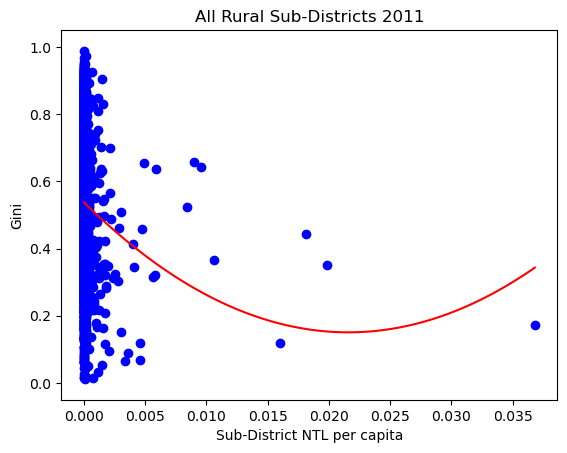

In [22]:

ale = final2011.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.06]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2011")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(-0.02,0.6)
plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

# 2020 Rework

In [25]:

## ma_ntl_data_updatedsums_Latest_Alldata is the main file
ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data_updatedsums_Latest_Alldata.csv',low_memory=False) #ma_ntl_data ma_ntl_data_updatedsums_NoVIIRS ma_ntl_data_updatedsums_NEW ma_ntl_data_updatedsums_NEW_Alldata

# ma = pd.read_csv('/Users/sid/Desktop/ma_ntl_data_updatedsums_Latest_Alldata.csv',low_memory=False)

meg = ma.copy()
meg = meg.drop([
    # 'Subdistrict', 'SubDistrict code', 'District','District code','Block code', 'Block', 'State',
    #    'State code','Village',
       'other_assembly_constituencies',
       'subdist_ntl_pa','vilcode11_y'
       ], axis=1)

meg = meg.rename(columns={
                        'state_name': 'State', 
                        'district_name': 'District',
                        'gp_name':'GP',
                        'sub_district_name':'Subdistrict',
                        'village_name':'Village','block_name':'Block',
                        'state_code':'State_code','district_code':'District_code','sub_district_code':'Subdistrict_code',
                        'block_code':'Block_code','gp_code':'GP_code',
                        'Village code':'Village_code',
                        'vilcode11_x':'vilcode11'
                                    })

# meg = meg.dropna(subset=['avg_ntl'])
# meg = meg.dropna(subset=['total_population'])
meg = meg[meg['total_population'] != 'Nava Mota']
meg['total_population'] = meg['total_population'].astype(float)
meg["ntl_pc"]= meg['avg_ntl']/meg['total_population']

# Reset the index if needed
meg.reset_index(drop=True, inplace=True)



In [ ]:
summary_stats = meg.describe()
summary_stats

In [26]:
meg_filtered = meg[[
    'State_code',
    'State',
    'District_code',
    'District',
    'Subdistrict_code',
    'Subdistrict',
    'Village_code',
    'Village',
    'GP_code',
    'GP',
    'total_hhd',
    'total_population',
    'male_population',
    'female_population',
    'total_hhd_engaged_in_farm_activities',
    'total_hhd_having_bpl_cards',
    'availability_of_primary_school',
    'availability_of_middle_school',
    'availability_of_high_school',
    'availability_of_ssc_school',
    'availability_of_govt_degree_college',
    'is_vocational_edu_centre_available',
    'availability_of_phc_chc',
    'availability_of_jan_aushadhi_kendra',
    'availability_of_mother_child_health_facilities',
    'is_veterinary_hospital_available',
    'is_aanganwadi_centre_available',
    'is_bank_available',
    'is_post_office_available',
    'availability_of_public_transport',
    'availability_of_railway_station',
    'is_village_connected_to_all_weather_road',
    'availability_of_market',
    'nearest_urban_proximity',
    'Village',
    'stcode11',
    'dtcode11',
    'sdtcode11',
    'vilcode11',
    'state',
    'district',
    'subdistrict',
    'vilname11',
    'vil_code',
    'dist_lgd',
    'state_lgd',
    'gpcode',
    'gp',
    'subdt_lgd',
    'Block',
    'block_lgd',
    'ac_no',
    'village_area_sqkm',
    'SubDistrict Area',
    'avg_ntl',
    'ntl_pa',
    'ntl_pc'
]]

In [27]:
meg_renamed = meg_filtered.rename(columns={
                                           'total_population':'population',
                                  'male_population':'male_pop','female_population':'female_pop',
                                  'total_hhd_engaged_in_farm_activities':'hh_in_farm','total_hhd_having_bpl_cards':'bpl_cards_hh',
                                  'availability_of_primary_school':'p_school','availability_of_middle_school':'m_school',
                                  'availability_of_high_school':'h_school','availability_of_ssc_school':'ssc_school',
                                  'availability_of_govt_degree_college':'arts_and_science_degree_college',
                                  'is_vocational_edu_centre_available':'iti',
                                  'availability_of_phc_chc':'phc',
                                  'availability_of_mother_child_health_facilities':'mcwc','availability_of_jan_aushadhi_kendra':'dispensary',
                                  'is_veterinary_hospital_available':'veterinary_hospital','is_post_office_available':'post_office',
                                  'availability_of_public_transport':'bus',
                                  'availability_of_railway_station':'railway',
                                  'is_village_connected_to_all_weather_road':'all_weather_road',
                                  'is_bank_available':'cooperative_bank',
                                  'availability_of_market':'mandis',
                                  'is_aanganwadi_centre_available':'aanganwadi',                                  
                                  'nearest_urban_proximity':'nearest_town_distance'
                                  })
meg_renamed

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Village_code,Village,Village,GP_code,GP,total_hhd,population,male_pop,female_pop,hh_in_farm,bpl_cards_hh,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,Village,Village,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc
0,21,ODISHA,350,CUTTACK,2956,Mahanga,399515.0,Juipur,JUIPUR,116997,HALADIA,4.0,10.0,6.0,4.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.759997,Juipur,JUIPUR,21.0,381.0,2956,399515.0,ODISHA,Cuttack,Mahanga,Juipur,399515.0,350.0,21.0,116997.0,HALADIA,2956.0,MAHANGA,MAHANGA,3339.0,95.0,0.734618,232.347463,8.646666,11.770295,0.864667
1,21,ODISHA,350,CUTTACK,2956,Mahanga,399612.0,Jhadeswarpur,JHADESWARPUR,116997,HALADIA,829.0,3365.0,1714.0,1651.0,700.0,405.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0.593258,Jhadeswarpur,JHADESWARPUR,21.0,381.0,2956,399612.0,ODISHA,Cuttack,Mahanga,Jhadeswarpur,399612.0,350.0,21.0,116997.0,HALADIA,2956.0,MAHANGA,MAHANGA,3339.0,95.0,3.249447,232.347463,25.984444,7.996574,0.007722
2,21,ODISHA,373,SUNDARGARH,2826,Koida,384764.0,Kalmanga,KALAMANGA,121618,MALDA,98.0,250.0,158.0,92.0,0.0,15.0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,6.777968,Kalmanga,KALAMANGA,21.0,374.0,2826.0,384764.0,ODISHA,Sundargarh,Koida,Kalmanga,384764.0,373.0,21.0,121618.0,MALDA,2826.0,KOIDA,KOIDA,3579.0,14.0,9.149993,409.789450,142.695557,15.595155,0.570782
3,21,ODISHA,348,BHADRAK,2918,Dhusuri,395292.0,Palasahi,Palasahi,116743,PALASAHI,916.0,4950.0,2555.0,2395.0,695.0,322.0,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,5.676526,Palasahi,Palasahi,21.0,378.0,2918,395292.0,ODISHA,Bhadrak,Dhusuri,Palasahi,395292.0,348.0,21.0,116743.0,PALASAHI,2918.0,DHAMANAGAR,DHAMANAGAR,3327.0,46.0,2.444098,143.099406,19.591111,8.015683,0.003958
4,21,ODISHA,349,BOUDH,3128,Manamunda,418004.0,Kumarakani,KUMARKANI,275028,KHALIAPALI,104.0,498.0,231.0,267.0,1.0,1.0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1.035106,Kumarakani,KUMARKANI,21.0,391.0,3128,418004.0,ODISHA,Boudh,Manamunda,Kumarakani,418004.0,349.0,21.0,275028.0,KHALIAPALI,3128.0,BOUDH,BOUDH,3329.0,85.0,2.623406,622.361985,10.174444,3.878335,0.020431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539771,22,CHHATTISGARH,734,Gaurella Pendra Marwahi,3288,Marwahi,437548.0,Kumhari,KUMHARI,122889,KUMHARI,766.0,2796.0,1406.0,1390.0,740.0,766.0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,6.627656,Kumhari,KUMHARI,22.0,791.0,03288,437548.0,CHHATTISGARH,Gaurella Pendra Marwahi,Marwahi,Kumhari,437548.0,734.0,22.0,122889.0,KUMHARI,3288.0,MARWAHI,MARWAHI,3609.0,24.0,7.915236,847.104651,39.628889,5.006660,0.014173
539772,22,CHHATTISGARH,734,Gaurella Pendra Marwahi,3288,Marwahi,437584.0,Madai,MARAI,122893,MADAI,507.0,1688.0,798.0,846.0,278.0,487.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9.434859,Madai,MARAI,22.0,791.0,03288,437584.0,CHHATTISGARH,Gaurella Pendra Marwahi,Marwahi,Madai,437584.0,734.0,22.0,122893.0,MADAI,3288.0,MARWAHI,MARWAHI,3609.0,24.0,10.674884,847.104651,55.677778,5.215773,0.032984
539773,22,CHHATTISGARH,374,BASTAR,3363,Bastar,449336.0,Pallichakwa,PALLICHAKWA,121919,BODANPAL,250.0,450.0,250.0,200.0,150.0,120.0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,0,1,0,2.425191,Pallichakwa,PALLICHAKWA,22.0,414.0,03363,449336.0,CHHATTISGARH,Bastar,Bastar,Pallichakwa,449336.0,374.0,22.0,121919.0,BODANPAL,3363.0,BASTAR,BASTAR,3593.0,85.0,3.241391,1160.344223,14.326667,4.419913,0.031837
539774,22,CHHATTISGARH,389,SURGUJA,3253,Batouli,433505.0,Nakna,NAKNA,130602,NAKNA,450.0,2200.0,1280.0,920.0,445.0,362.0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,NaN,Nakna,NAKNA,22.0,401.0,03253,433505.0,

In [26]:
meg_renamed=meg_renamed.drop_duplicates(subset='vil_code')
meg_sorted = meg_renamed.sort_values(by=['state','district', 'subdistrict','ntl_pc'])
meg_sorted['Index'] = meg_sorted.groupby(['state','district','subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
meg_sorted['Max_Len'] = meg_sorted.groupby(['state','district','subdistrict'])['Index'].transform('max')

meg_sorted = meg_sorted[meg_sorted['population'] != 0]

meg_sorted

,State_code,State,District_code,District,Subdistrict_code,Subdistrict,Village_code,Village,Village,GP_code,GP,total_hhd,population,male_pop,female_pop,hh_in_farm,bpl_cards_hh,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,Village,Village,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,ntl_pa_pc,Index,Max_Len
47516,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,645220.0,Sitanagar (RV),SITAPUR,234476,SITANAGAR,660.0,2477.0,1271.0,1184.0,243.0,0.0,1,1,0,1,0,1,0,0,1,1,1,0,1,1,0,1,0,NaN,Sitanagar (RV),SITAPUR,35.0,639.0,05919,645220.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Sitanagar (RV),645220.0,632.0,35.0,234476.0,SITANAGAR,5919.0,DIGLIPUR,DIGLIPUR,6492.0,NaN,10.426155,1534.907491,28.177778,2.702605,0.011376,0.001091,1,30
47601,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,645232.0,Nabagram (RV),NABAGRAM,234471,NABAGRAM,566.0,2191.0,1144.0,1047.0,252.0,70.0,1,0,1,0,0,0,0,0,1,1,1,0,1,1,0,1,0,14.076984,Nabagram (RV),NABAGRAM,35.0,639.0,05919,645232.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Nabagram (RV),645232.0,632.0,35.0,234471.0,NABAGRAM,5919.0,DIGLIPUR,DIGLIPUR,6492.0,NaN,13.078955,1534.907491,35.701110,2.729661,0.016294,0.001246,2,30
47536,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,645218.0,Madhupur (RV),MADHUPUR,234470,MADHUPUR,819.0,3097.0,1664.0,1433.0,731.0,209.0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1.609613,Madhupur (RV),MADHUPUR,35.0,639.0,05919,645218.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Madhupur (RV),645218.0,632.0,35.0,234470.0,MADHUPUR,5919.0,DIGLIPUR,DIGLIPUR,6492.0,NaN,7.669943,1534.907491,29.957777,3.905867,0.009673,0.001261,3,30
47489,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,645239.0,Ramnagar (RV),RAM NAGAR,234474,RAMNAGAR,355.0,1350.0,698.0,652.0,302.0,53.0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,11.592445,Ramnagar (RV),RAM NAGAR,35.0,639.0,05919,645239.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Ramnagar (RV),645239.0,632.0,35.0,234474.0,RAMNAGAR,5919.0,DIGLIPUR,DIGLIPUR,6492.0,NaN,12.149937,1534.907491,25.368889,2.087985,0.018792,0.001547,4,30
47447,35,ANDAMAN AND NICOBAR ISLANDS,632,NORTH AND MIDDLE ANDAMAN,5919,Diglipur,645234.0,Kishori Nagar (RV),KISHORI NAGAR,234468,KISHORINAGAR,339.0,1205.0,649.0,556.0,266.0,124.0,1,1,1,1,0,0,1,0,1,0,1,1,1,1,0,1,1,15.197923,Kishori Nagar (RV),KISHORI NAGAR,35.0,639.0,05919,645234.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Kishori Nagar (RV),645234.0,632.0,35.0,234468.0,KISHORINAGAR,5919.0,DIGLIPUR,DIGLIPUR,6492.0,NaN,17.769062,1534.907491,40.511111,2.279868,0.033619,0.001892,5,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,19,WEST BENGAL,321,PURULIA,2384,Santuri,330534.0,Khayerbasia Chak,Jorberya,111120,SANTURI,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.646521,Khayerbasia Chak,Jorberya,19.0,340.0,02384,330534.0,WEST BENGAL,Purulia,Santuri,Khayerbasia Chak,330534.0,321.0,19.0,111120.0,SANTURI,2384.0,SANTURI,SANTURI,3063.0,246.0,0.410174,216.977568,4.962222,12.097843,4.962222,12.097843,96,100
63063,19,WEST BENGAL,321,PURULIA,2384,Santuri,330495.0,Rakta,Raigara,111116,BALITORA,1.0,2.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.099011,Rakta,Raigara,19.0,340.0,02384,330495.0,WEST BENGAL,Purulia,Santuri,Rakta,330495.0,321.0,19.0,111116.0,BALITORA,2384.0,SANTURI,SANTURI,3063.0,246.0,0.997875,216.977568,43.505555,43.598220,21.752778,21.799110,97,100
63

In [27]:
meg_codes = meg_sorted[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
meg_codes=meg_codes.drop_duplicates(subset=['state','district','subdistrict',])


In [28]:
meg_sub = meg_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum',
                                                                               'mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean','ntl_pa_pc':'mean'
                                                                               }).reset_index()

meg_sub['subdist_ntl_pc']=meg_sub['avg_ntl']/meg_sub['population']
meg_sub['subdist_ntl_pa']=meg_sub['avg_ntl']/meg_sub['village_area_sqkm']
meg_sub['subdist_ntl_pa_pc']=meg_sub['subdist_ntl_pa']/meg_sub['population']
meg_sub

,state,district,subdistrict,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,mcwc,dispensary,veterinary_hospital,aanganwadi,post_office,bus,railway,all_weather_road,cooperative_bank,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,ntl_pa_pc,subdist_ntl_pc,subdist_ntl_pa,subdist_ntl_pa_pc
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35692.0,18564.0,17104.0,27,15,10,6,0,2,4,25,1,15,30,11,19,0,27,5,10,6.615819,211.546587,1534.907491,787.377774,167.883888,0.031353,0.007067,0.022060,3.722007,0.000104
1,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,23019.0,11680.0,11339.0,19,6,7,4,1,0,3,17,0,10,23,8,13,0,21,4,10,9.168078,83.322747,818.131581,326.962222,124.832381,0.016296,0.006621,0.014204,3.924045,0.000170
2,ANDAMAN & NICOBAR,North And Middle Andaman,Rangat,28938.0,14641.0,14273.0,31,20,11,8,0,1,5,26,1,11,37,13,29,0,34,7,11,17.883180,899.964131,1295.502730,1598.068923,163.210404,0.054991,0.013772,0.055224,1.775703,0.000061
3,ANDAMAN & NICOBAR,South Andamans,Ferrargunj,46213.0,23647.0,22565.0,31,15,9,8,0,2,6,32,1,12,40,14,38,0,38,10,17,5.210248,151.718945,1357.952352,820.467774,335.272985,0.023335,0.012375,0.017754,5.407814,0.000117
4,ANDAMAN & NICOBAR,South Andamans,Little Andaman,23128.0,12138.0,10990.0,5,4,3,2,0,1,4,5,1,3,5,3,5,0,5,3,5,1.834232,728.126714,736.782070,1073.398881,18.433553,0.049661,0.000791,0.046411,1.474192,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,WEST BENGAL,Purulia,Purulia - I,166802.0,86829.0,79373.0,102,48,34,29,7,19,13,83,3,35,99,56,73,14,89,21,7,6.076268,325.686282,338.330324,1947.184437,688.864212,0.034051,0.041070,0.011674,5.978712,0.000036
5639,WEST BENGAL,Purulia,Purulia - II,194734.0,101166.0,93399.0,103,47,25,20,1,2,3,33,8,7,101,37,52,4,91,14,7,7.531072,366.596006,385.255824,3537.317640,1099.607996,0.700143,0.555189,0.018165,9.649089,0.000050
5640,WEST BENGAL,Purulia,Raghunathpur - I,104148.0,54109.0,50021.0,68,15,11,8,1,3,1,35,1,1,73,9,18,6,49,5,2,5.396432,202.929418,230.787399,1708.232216,861.738852,0.241409,0.312738,0.016402,8.417864,0.000081
5641,WEST BENGAL,Purulia,Raghunathpur - II,129086.0,67609.0,61467.0,80,19,10,9,1,3,3,46,6,1,84,15,19,2,77,4,3,4.238327,236.032043,238.179758,4209.538889,2493.836300,1.358233,2.170871,0.032610,17.834608,0.000138


In [29]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale20 = meg_sorted.groupby(['state','district',
                          'subdistrict',
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale20.columns = ['state','district',
               'subdistrict',
            #    'subdist_ntl','subdist_population',
            #    'subdist_ntl_pc','ntl_pc_mean',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

In [30]:
f2 = pd.merge(meg_sub, ale20, on=['state','district','subdistrict'],how='left')
final2020 = pd.merge(f2, meg_codes, on=['state','district','subdistrict'],how='inner')
final2020['year']=2020
final2020

,state,district,subdistrict,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,mcwc,dispensary,veterinary_hospital,aanganwadi,post_office,bus,railway,all_weather_road,cooperative_bank,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,ntl_pa_pc,subdist_ntl_pc,subdist_ntl_pa,subdist_ntl_pa_pc,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd,year
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35692.0,18564.0,17104.0,27,15,10,6,0,2,4,25,1,15,30,11,19,0,27,5,10,6.615819,211.546587,1534.907491,787.377774,167.883888,0.031353,0.007067,0.022060,3.722007,0.000104,0.212008,1.656205,30.0,0.512535,35.0,639.0,05919,35.0,632.0,5919.0,2020
1,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,23019.0,11680.0,11339.0,19,6,7,4,1,0,3,17,0,10,23,8,13,0,21,4,10,9.168078,83.322747,818.131581,326.962222,124.832381,0.016296,0.006621,0.014204,3.924045,0.000170,0.152282,1.191837,23.0,0.362910,35.0,639.0,05920,35.0,632.0,5920.0,2020
2,ANDAMAN & NICOBAR,North And Middle Andaman,Rangat,28938.0,14641.0,14273.0,31,20,11,8,0,1,5,26,1,11,37,13,29,0,34,7,11,17.883180,899.964131,1295.502730,1598.068923,163.210404,0.054991,0.013772,0.055224,1.775703,0.000061,0.509556,4.335580,37.0,0.567106,35.0,639.0,05921,35.0,632.0,5921.0,2020
3,ANDAMAN & NICOBAR,South Andamans,Ferrargunj,46213.0,23647.0,22565.0,31,15,9,8,0,2,6,32,1,12,40,14,38,0,38,10,17,5.210248,151.718945,1357.952352,820.467774,335.272985,0.023335,0.012375,0.017754,5.407814,0.000117,0.507372,5.131947,41.0,0.530987,35.0,640.0,05922,35.0,602.0,5922.0,2020
4,ANDAMAN & NICOBAR,South Andamans,Little Andaman,23128.0,12138.0,10990.0,5,4,3,2,0,1,4,5,1,3,5,3,5,0,5,3,5,1.834232,728.126714,736.782070,1073.398881,18.433553,0.049661,0.000791,0.046411,1.474192,0.000064,0.003953,0.009542,5.0,0.234525,35.0,640.0,05924,35.0,602.0,5924.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,WEST BENGAL,Purulia,Purulia - I,166802.0,86829.0,79373.0,102,48,34,29,7,19,13,83,3,35,99,56,73,14,89,21,7,6.076268,325.686282,338.330324,1947.184437,688.864212,0.034051,0.041070,0.011674,5.978712,0.000036,4.271312,24.878216,104.0,0.897606,19.0,340.0,02387,19.0,321.0,2387.0,2020
5639,WEST BENGAL,Purulia,Purulia - II,194734.0,101166.0,93399.0,103,47,25,20,1,2,3,33,8,7,101,37,52,4,91,14,7,7.531072,366.596006,385.255824,3537.317640,1099.607996,0.700143,0.555189,0.018165,9.649089,0.000050,62.181164,226.496871,112.0,0.943883,19.0,340.0,02379,19.0,321.0,2379.0,2020
5640,WEST BENGAL,Purulia,Raghunathpur - I,104148.0,54109.0,50021.0,68,15,11,8,1,3,1,35,1,1,73,9,18,6,49,5,2,5.396432,202.929418,230.787399,1708.232216,861.738852,0.241409,0.312738,0.016402,8.417864,0.000081,25.019044,58.738590,80.0,0.953806,19.0,340.0,02382,19.0,321.0,2382.0,2020
5641,WEST BENGAL,Purulia,Raghunathpur - II,129086.0,67609.0,61467.0,80,19,10,9,1,3,3,46,6,1,84,15,19,2,77,4,3,4.238327,236.032043,238.179758,4209.538889,2493.836300,1.358233,2.170871,0.032610,17.834608,0.000138,225.770633,1174.572362,104.0,0.909567,19.0,340.0,02381,19.0,321.0,2381.0,2020


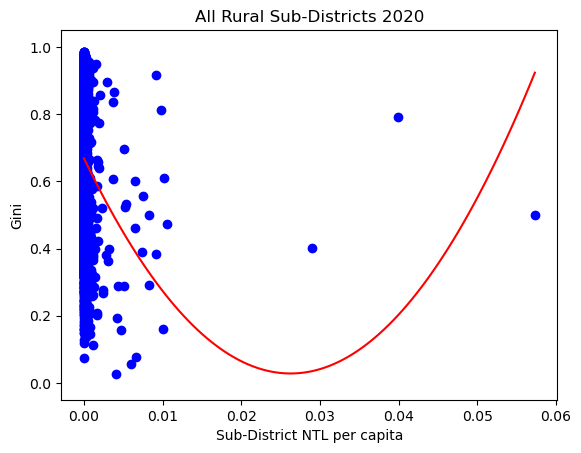

In [31]:

ale = final2020.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.06]

# ale = ale[ale['num']>10]

# Create a scatterplot
plt.scatter(ale['subdist_ntl_pc'], ale['alesina'], label='Alesina Gini', color='blue', marker='o')
# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("All Rural Sub-Districts 2020")
# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(ale['subdist_ntl_pc'], ale['alesina'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(ale['subdist_ntl_pc']), max(ale['subdist_ntl_pc']), 100)
y_fit = polynomial(x_range)
# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red')
# plt.xlim(-0.02,0.6)
plt.ylim(-0.05,1.05)

# Add a legend
# plt.legend()
# Display the plot
plt.show()

# 2017 Rework

## Recoding

In [ ]:
ma2 = pd.read_csv('/Users/sid/Documents/MA_17/MA_2017.csv',low_memory=False)
ma2 = ma2[ma2['Total Population'] > 0]
ntl17 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/India_NTL_2018.csv') 

In [ ]:
ma2.columns

In [ ]:
# Get unique values in the column
unique_cities = ma2['Availability of Vocational Educational  Centre/ITI/RSETI/DDU-GKY'].unique()

unique_cities

In [ ]:
def remove_extra_spaces(col):
  # Check if dtype is string, then apply string methods
  if pd.api.types.is_string_dtype(col):
    return col.str.strip().str.replace('\s+', ' ', regex=True)
  # Otherwise, return the column as-is (for integer columns)
  else:
    return col

# Apply the function to each column using apply
ma2 = ma2.apply(remove_extra_spaces)

In [ ]:
# Initialize new columns with zeros
ma2['p_school'] = 0
ma2['m_school'] = 0
ma2['h_school'] = 0
ma2['ssc_school'] = 0

# Define a function to set the appropriate columns based on the value
def set_school_columns(row):
    if row['Availability of School'] == 'Primary School':
        row['p_school'] = 1
    elif row['Availability of School'] == 'Middle School':
        row['p_school'] = 1
        row['m_school'] = 1
    elif row['Availability of School'] == 'High School':
        row['p_school'] = 1
        row['m_school'] = 1
        row['h_school'] = 1
    elif row['Availability of School'] == 'Senior Secondary School':
        row['p_school'] = 1
        row['m_school'] = 1
        row['h_school'] = 1
        row['ssc_school'] = 1
    return row

# Apply the function to each row
ma3 = ma2.apply(set_school_columns, axis=1)

In [ ]:
ma3 = ma3.fillna(0)
# Define a dictionary for mapping
replacements = {"Yes": 1, 
                "No ( Nearest facility< 1 Km)":1,
                "No ( Nearest facility1-2 kms)":1,
                "No ( Nearest facility2-5 kms)": 0,
                'No ( Nearest facility5-10 Kms)':0,
                "No ( Nearest facilityMore than 10 kms)": 0,
                "No ( Nearest facility10-20 kms)":0,
                "No ( Nearest facilityMore than 20 kms)":0,
                'No ( Nearest facility)':0,
                "No": 0 ,

                "Not covered":0,
                "Partially covered":1,
                "Fully covered":1,

                "_":0,

                "Bus":1,
                "Auto":0,
                "Van":0,
                "None ( Nearest facility< 1  Km)":1,
                "None ( Nearest facility1-2  kms)":1,
                "None ( Nearest facility2-5  kms)":0,
                "None ( Nearest facility5-10  Kms)":0,
                "None ( Nearest facilityMore  than 10 kms)":0,
                "None ( Nearest facilityMore than 10 kms)":0,
                "None ( Nearest facility)":0,

                "None ( Nearest facility< 1 Km)":1,
                "None ( Nearest facility1-2 kms)":1,
                "None ( Nearest facility2-5 kms)":0,
                "None ( Nearest facility5-10 Kms)":0,


                "Mandis":1,
                "Regular market":1,
                "Weekly Haat":1,

                "CHC":1,
                "PHC":1,
                "Sub Centre":1,

                'None':0,
                }

ma4 = ma3.replace(replacements)


In [ ]:
print(ma4['Village code'].dtype)
print(ntl12['vil_code'].dtype)


In [ ]:
ma4['Village code'] = pd.to_numeric(ma4['Village code'], errors='coerce')
ntl12['Village code'] = pd.to_numeric(ntl12['vil_code'], errors='coerce')
# Drop rows with NaN values in 'Village code'
ma4 = ma4.dropna(subset=['Village code'])
ntl12 = ntl12.dropna(subset=['vil_code'])

ma4['Village code'] = ma4['Village code'].astype(int)
ntl12['vil_code'] = ntl12['vil_code'].astype(int)

fin3 = pd.merge(ma4, ntl17, left_on='Village code', right_on='vil_code', how='inner')
# fin3 = fin3.drop(['State code','State','District code',
#                     'District','Subdistrict','SubDistrict code','Block code','Block'
#                     ], axis=1)
fin3['ntl_pc']=fin3['avg_ntl']/fin3['Total Population']
fin3

## Analysis

In [ ]:
column_names = fin3.columns.tolist()
column_names

In [ ]:
ma17=fin3.copy()
ma17 = ma17.dropna(subset=['avg_ntl'])
ma17 = ma17.dropna(subset=['Total Population'])


In [ ]:
ma17_filtered = ma17[['State',
                    'State code',
                    'District',
                    'District code',
                    'Sub District',
                    'Sub District code',
                    'Village_x',
                    'Village code',
                    'Gram Panchayat',
                    'Gram Panchayat code',
                    'Total Household',
                    'Total Population',
                    'Male',
                    'Female',
                    '% households engaged exclusively in Farm  activitie',
                    'p_school',
                    'm_school',
                    'h_school',
                    'ssc_school',
                    'Availability of Vocational Educational  Centre/ITI/RSETI/DDU-GKY',
                    'Availability of Sub centre /PHC/CHC',
                    'Availability Of Aanganwadi Centre',
                    'Availability of Veterinary Clinic Hospital',
                    'Availability of banks',
                    'Availability of Post office/Sub-Post office',
                    'Availability of markets',
                    'Availability of Public Transport',
                    'Whether the village is connected to All  weather road',
                    'Village_y',
                    'stcode11',
                    'dtcode11',
                    'sdtcode11',
                    'vilcode11',
                    'state',
                    'district',
                    'subdistrict',
                    'vilname11',
                    'vil_code',
                    'dist_lgd',
                    'state_lgd',
                    'gpcode',
                    'gp',
                    'subdt_lgd',
                    'Block',
                    'block_lgd',
                    'ac_no',
                    'village_area_sqkm',
                    'SubDistrict Area',
                    'subdist_ntl_pa',
                    'avg_ntl',
                    'ntl_pa',
                    'ntl_pc'
]]

In [ ]:
ma17_renamed=  ma17_filtered.rename(columns={
                    'Total Household':'total_hhd','Total Population':'population',
                    'Male':'male_pop','Female':'female_pop',
                    '% households engaged exclusively in Farm  activitie':'hh_in_farm',
                    'Availability of Vocational Educational  Centre/ITI/RSETI/DDU-GKY':'iti',
                    'Availability of Sub centre /PHC/CHC':'phc',
                    'Availability Of Aanganwadi Centre':'aanganwadi',
                    'Availability of Veterinary Clinic Hospital':'veterinary_hospital',
                    'Availability of banks':'cooperative_bank',
                    'Availability of Post office/Sub-Post office':'post_office',
                    'Availability of markets':'mandis',
                    'Availability of Public Transport':'bus',
                    'Whether the village is connected to All  weather road':'all_weather_road',
                    'Village_y':'Village',
})

ma17_renamed = ma17_renamed.drop([
       'Village_x',
       ], axis=1)

In [ ]:
ma17_renamed=ma17_renamed.drop_duplicates(subset='vil_code')
ma17_sorted = ma17_renamed.sort_values(by=['state','district', 'subdistrict','ntl_pc'])
ma17_sorted['Index'] = ma17_sorted.groupby(['state','district','subdistrict']).cumcount() + 1
# Creating a new column 'Max_Len' containing the maximum value of 'Index' within each district
ma17_sorted['Max_Len'] = ma17_sorted.groupby(['state','district','subdistrict'])['Index'].transform('max')

ma17_sorted = ma17_sorted[ma17_sorted['population'] != 0]

ma17_sorted

In [ ]:
ma17_codes = ma17_sorted[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
ma17_codes=ma17_codes.drop_duplicates(subset=['state','district','subdistrict',])


columns_to_convert = ['iti', 'phc', 'veterinary_hospital', 'post_office']
ma17_sorted[columns_to_convert] = ma17_sorted[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [ ]:
ma17_sub = ma17_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'iti':'sum',
                                                                               'phc':'sum',
                                                                               'veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean'
                                                                               }).reset_index()

ma17_sub['subdist_ntl_pc']=ma17_sub['avg_ntl']/ma17_sub['population']
ma17_sub

In [ ]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale17 = ma17_sorted.groupby(['state','district',
                          'subdistrict',
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale17.columns = ['state','district',
               'subdistrict',
            #    'subdist_ntl','subdist_population',
            #    'subdist_ntl_pc','ntl_pc_mean',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]

In [ ]:
f3 = pd.merge(ma17_sub, ale17, on=['state','district','subdistrict'],how='left')
final2017 = pd.merge(f3, ma17_codes, on=['state','district','subdistrict'],how='inner')
final2017['year']=2017
final2017

# Build Panel

In [32]:
mega = pd.concat([final2011,final2020])
mega

,state,district,subdistrict,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,icds,aanganwadi,asha,post_office,subpost_office,bus,railway,auto,vans,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,subdist_ntl_pa,ntl_pa,ntl_pc,ntl_pa_pc,subdist_ntl_pc,subdist_ntl_pa_pc,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd,year
0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,841.0,456.0,385.0,0.0,838.0,1,1,1,1,0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1.0,1,1.0,1,1,1.0,1.0,1,1.0,1,1.0,1,NaN,135.035888,135.035888,177.961430,1.317882,1.317882,0.211607,0.001567,0.211607,0.001567,0.001567,0.001567,1.0,0.000000,35.0,638.0,05916,35.0,603.0,5916.0,2011
1,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,20.0,15.0,5.0,0.0,20.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,1,1.0,1,1,1.0,1.0,1,1.0,1,1.0,1,NaN,1.867272,1167.356958,0.655714,0.351162,0.351162,0.032786,0.017558,0.032786,0.017558,0.017558,0.035116,2.0,-0.500000,35.0,638.0,05918,35.0,603.0,5918.0,2011
2,ANDAMAN & NICOBAR,Nicobars,Nancowry,472.0,278.0,194.0,0.0,419.0,0,0,0,0,0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4,4.0,4,4.0,4,4,4.0,4.0,4,4.0,4,4.0,4,NaN,261.392905,518.303656,87.879997,0.336199,1.942922,1.347841,0.012593,0.186186,0.000712,0.050373,0.173979,6.0,0.015390,35.0,638.0,05917,35.0,603.0,5917.0,2011
3,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35723.0,18643.0,17080.0,0.0,120.0,31,15,12,5,0,0.0,0,1.0,3.0,14.0,1.0,1.0,0.0,18.0,31,31.0,1,9.0,23,0,18.0,17.0,30,1.0,3,15.0,4,334.194444,1467.666522,1534.907491,649.064282,0.442242,69.529339,0.147162,0.014365,0.018169,0.000012,0.517133,1.541369,36.0,0.862189,35.0,639.0,05919,35.0,632.0,5919.0,2011
4,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,20383.0,10492.0,9891.0,0.0,139.0,20,11,5,2,1,0.0,1,0.0,2.0,9.0,0.0,1.0,4.0,18.0,21,21.0,4,8.0,18,0,12.0,4.0,4,2.0,2,15.0,9,222.600000,84.066677,818.131581,95.486024,1.135837,40.337002,0.022656,0.059749,0.004685,0.000056,1.493716,2.339719,25.0,0.914690,35.0,639.0,05920,35.0,632.0,5920.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,WEST BENGAL,Purulia,Purulia - I,166802.0,86829.0,79373.0,NaN,NaN,102,48,34,29,7,NaN,19,NaN,13.0,NaN,83.0,3.0,35.0,NaN,99,NaN,56,NaN,73,14,NaN,NaN,89,NaN,21,NaN,7,6.076268,325.686282,338.330324,1947.184437,5.978712,688.864212,0.034051,0.041070,0.011674,0.000036,4.271312,24.878216,104.0,0.897606,19.0,340.0,02387,19.0,321.0,2387.0,2020
5639,WEST BENGAL,Purulia,Purulia - II,194734.0,101166.0,93399.0,NaN,NaN,103,47,25,20,1,NaN,2,NaN,3.0,NaN,33.0,8.0,7.0,NaN,101,NaN,37,NaN,52,4,NaN,NaN,91,NaN,14,NaN,7,7.531072,366.596006,385.255824,3537.317640,9.649089,1099.607996,0.700143,0.555189,0.018165,0.000050,62.181164,226.496871,112.0,0.943883,19.0,340.0,02379,19.0,321.0,2379.0,2020
5640,WEST BENGAL,Purulia,Raghunathpur - I,104148.0,54109.0,50021.0,NaN,NaN,68,15,11,8,1,NaN,3,NaN,1.0,NaN,35.0,1.0,1.0,NaN,73,NaN,9,NaN,18,6,NaN,NaN,49,NaN,5,NaN,2,5.396432,202.929418,230.787399,1708.232216,8.417864,861.738852,0.241409,0.312738,0.016402,0.000081,25.019044,58.738590,80.0,0.953806,19.0,340.0,02382,19.0,321.0,2382.0,2020
5641,WEST BENGAL,Purulia,Raghunathpur - II,129086.0,67609.0,61467.0,NaN,NaN,80,19,10,9,1,NaN,3,NaN,3.0,NaN,46.0,6.0,1.0,NaN,84,NaN,15,NaN,19,2,NaN,NaN,77,NaN,4,NaN,3,4.238327,236.032043,238.179758,4209.538889,17.834608,2493.836300,1.358233,2.170871,0.032610,0.000138,225.770633,1174.572362,104.0,0.909567,19.0,340.0,02381,19.0,321.0,2381.0,2020


In [35]:
mega['no_1000s'] = mega['population']/1000

mega['edu']= mega['p_school']+mega['m_school']+mega['h_school']+\
             mega['ssc_school']+mega['arts_and_science_degree_college']+mega['iti']
mega['edu_per_1000']= mega['edu']/mega['no_1000s']
mega['p_sch_per_1000']= mega['p_school']/mega['no_1000s']
mega['m_sch_per_1000']= mega['m_school']/mega['no_1000s']
mega['h_sch_per_1000']= mega['h_school']/mega['no_1000s']
mega['ssc_sch_per_1000']= mega['ssc_school']/mega['no_1000s']
mega['col_per_1000']= mega['arts_and_science_degree_college']/mega['no_1000s']
mega['iti_per_1000']= mega['iti']/mega['no_1000s']


mega['med'] = mega['phc']+mega['mcwc']+mega['dispensary']+\
              mega['veterinary_hospital']+mega['aanganwadi']
mega['med_per_1000'] = mega['med']+mega['no_1000s']
mega['phc_per_1000']= mega['phc']/mega['no_1000s']
mega['mcwc_per_1000']= mega['mcwc']/mega['no_1000s']
mega['dis_per_1000']= mega['dispensary']/mega['no_1000s']
mega['vet_per_1000']= mega['veterinary_hospital']/mega['no_1000s']
mega['aanganwadi_per_1000']= mega['aanganwadi']/mega['no_1000s']

mega['adm'] = mega['cooperative_bank']+mega['post_office']+mega['mandis']
mega['adm_per_1000'] = mega['adm']+mega['no_1000s']
mega['bank_per_1000']= mega['cooperative_bank']/mega['no_1000s']
mega['po_per_1000']= mega['post_office']/mega['no_1000s']
mega['mandi_per_1000']= mega['mandis']/mega['no_1000s']


mega['share_roads'] = mega['all_weather_road']/mega['num']
mega['share_rails'] = mega['railway']/mega['num']
mega['share_pubtn'] = mega['bus']/mega['num']

mega['unique_id'] = mega['state'] + '_' + mega['district'] + '_' + mega['subdistrict']

mega


,state,district,subdistrict,population,male_pop,female_pop,sc_pop,st_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,polytechnic,iti,chc,phc,phc_subcentre,mcwc,dispensary,veterinary_hospital,icds,aanganwadi,asha,post_office,subpost_office,bus,railway,auto,vans,all_weather_road,commercial_bank,cooperative_bank,pds,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,subdist_ntl_pa,ntl_pa,ntl_pc,ntl_pa_pc,subdist_ntl_pc,subdist_ntl_pa_pc,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd,year,no_1000s,edu,edu_per_1000,p_sch_per_1000,m_sch_per_1000,h_sch_per_1000,ssc_sch_per_1000,col_per_1000,iti_per_1000,med,med_per_1000,phc_per_1000,mcwc_per_1000,dis_per_1000,vet_per_1000,aanganwadi_per_1000,adm,adm_per_1000,bank_per_1000,po_per_1000,mandi_per_1000,share_roads,share_rails,share_pubtn,unique_id
0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,841.0,456.0,385.0,0.0,838.0,1,1,1,1,0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1.0,1,1.0,1,1,1.0,1.0,1,1.0,1,1.0,1,NaN,135.035888,135.035888,177.961430,1.317882,1.317882,0.211607,0.001567,0.211607,0.001567,0.001567,0.001567,1.0,0.000000,35.0,638.0,05916,35.0,603.0,5916.0,2011,0.841,4,4.756243,1.189061,1.189061,1.189061,1.189061,0.000000,0.000000,1.0,1.841,0.000000,0.000000,0.000000,0.000000,1.189061,3,3.841,1.189061,1.189061,1.189061,1.000000,1.000000,1.000000,ANDAMAN & NICOBAR_Nicobars_Car Nicobar
1,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,20.0,15.0,5.0,0.0,20.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,1,1.0,1,1,1.0,1.0,1,1.0,1,1.0,1,NaN,1.867272,1167.356958,0.655714,0.351162,0.351162,0.032786,0.017558,0.032786,0.017558,0.017558,0.035116,2.0,-0.500000,35.0,638.0,05918,35.0,603.0,5918.0,2011,0.020,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.020,0.000000,0.000000,0.000000,0.000000,50.000000,3,3.020,50.000000,50.000000,50.000000,0.500000,0.500000,0.500000,ANDAMAN & NICOBAR_Nicobars_Great Nicobar
2,ANDAMAN & NICOBAR,Nicobars,Nancowry,472.0,278.0,194.0,0.0,419.0,0,0,0,0,0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,4,4.0,4,4.0,4,4,4.0,4.0,4,4.0,4,4.0,4,NaN,261.392905,518.303656,87.879997,0.336199,1.942922,1.347841,0.012593,0.186186,0.000712,0.050373,0.173979,6.0,0.015390,35.0,638.0,05917,35.0,603.0,5917.0,2011,0.472,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,4.472,0.000000,0.000000,0.000000,0.000000,8.474576,12,12.472,8.474576,8.474576,8.474576,0.666667,0.666667,0.666667,ANDAMAN & NICOBAR_Nicobars_Nancowry
3,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35723.0,18643.0,17080.0,0.0,120.0,31,15,12,5,0,0.0,0,1.0,3.0,14.0,1.0,1.0,0.0,18.0,31,31.0,1,9.0,23,0,18.0,17.0,30,1.0,3,15.0,4,334.194444,1467.666522,1534.907491,649.064282,0.442242,69.529339,0.147162,0.014365,0.018169,0.000012,0.517133,1.541369,36.0,0.862189,35.0,639.0,05919,35.0,632.0,5919.0,2011,35.723,63,1.763570,0.867788,0.419898,0.335918,0.139966,0.000000,0.000000,36.0,71.723,0.083980,0.027993,0.027993,0.000000,0.867788,8,43.723,0.083980,0.027993,0.111973,0.833333,0.000000,0.638889,ANDAMAN & NICOBAR_North And Middle Andaman_Dig...
4,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,20383.0,10492.0,9891.0,0.0,139.0,20,11,5,2,1,0.0,1,0.0,2.0,9.0,0.0,1.0,4.0,18.0,21,21.0,4,8.0,18,0,12.0,4.0,4,2.0,2,15.0,9,222.600000,84.066677,818.131581,95.486024,1.135837,40.337002,0.022656,0.059749,0.004685,0.000056,1.493716,2.339719,25.0,0.914690,35.0,639.0,05920,35.0,632.0,5920.0,2011,20.383,40,1.962420,0.981210,0.539665,0.245302,0.098121,0.049060,0.049060,28.0,48.383,0.098121,0.000000,0.049060,0.196242,1.030270,15,35.383,0.098121,0.196242,0.441544,0.160000,0.000000,0.720000,ANDAMAN & NICOBAR_North And Middle Andaman_May...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [36]:
mega.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel.csv',index=False)

# Village Matching Test

In [37]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [111]:
# meg_sorted.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/2020_Villages_sorted.csv',index=False)
# lum12_sorted.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/2011_Villages_sorted.csv',index=False)

# ale20.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Gini_2020.csv',index=False)
# ale2.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Gini_2011.csv',index=False)

meg_sorted = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/2020_Villages_sorted.csv')
lum12_sorted = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/2011_Villages_sorted.csv')

ale20 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Gini_2020.csv')
ale2 = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Gini_2011.csv')

### Main

In [39]:
lum12_sorted['sc_pop_share']=lum12_sorted['sc_pop']/lum12_sorted['population']
lum12_sorted['st_pop_share']=lum12_sorted['st_pop']/lum12_sorted['population']
meg_sorted['sc_pop_share'] = None
meg_sorted['st_pop_share'] = None

In [40]:
# Calculate the overall means
commercial_bank_mean = lum12_sorted['commercial_bank'].mean()
cooperative_bank_mean = lum12_sorted['cooperative_bank'].mean()

print("Overall mean of commercial_bank:", commercial_bank_mean)
print("Overall mean of cooperative_bank:", cooperative_bank_mean)

# Calculate the means under the specified conditions
commercial_bank_mean_coop_0 = lum12_sorted[lum12_sorted['cooperative_bank'] == 0]['commercial_bank'].mean()
commercial_bank_mean_coop_1 = lum12_sorted[lum12_sorted['cooperative_bank'] == 1]['commercial_bank'].mean()

cooperative_bank_mean_0 = lum12_sorted[lum12_sorted['commercial_bank'] == 0]['cooperative_bank'].mean()
cooperative_bank_mean_1 = lum12_sorted[lum12_sorted['commercial_bank'] == 1]['cooperative_bank'].mean()

# Means when both are 0
both_zero = lum12_sorted[(lum12_sorted['commercial_bank'] == 0) & (lum12_sorted['cooperative_bank'] == 0)]
both_zero_commercial_mean = both_zero['commercial_bank'].mean()
both_zero_cooperative_mean = both_zero['cooperative_bank'].mean()

# Means when both are 1
both_one = lum12_sorted[(lum12_sorted['commercial_bank'] == 1) & (lum12_sorted['cooperative_bank'] == 1)]
both_one_commercial_mean = both_one['commercial_bank'].mean()
both_one_cooperative_mean = both_one['cooperative_bank'].mean()


print("Mean of commercial_bank when cooperative_bank == 0:", commercial_bank_mean_coop_0)
print("Mean of commercial_bank when cooperative_bank == 1:", commercial_bank_mean_coop_1)
print("Mean of cooperative_bank when commercial_bank == 0:", cooperative_bank_mean_0)
print("Mean of cooperative_bank when commercial_bank == 1:", cooperative_bank_mean_1)


print("Mean of commercial_bank when both are 0:", both_zero_commercial_mean)
print("Mean of cooperative_bank when both are 0:", both_zero_cooperative_mean)

print("Mean of commercial_bank when both are 1:", both_one_commercial_mean)
print("Mean of cooperative_bank when both are 1:", both_one_cooperative_mean)

Overall mean of commercial_bank: 0.055982339189156925
Overall mean of cooperative_bank: 0.05265465691009614
Mean of commercial_bank when cooperative_bank == 0: 0.027697835132806627
Mean of commercial_bank when cooperative_bank == 1: 0.5648678731912438
Mean of cooperative_bank when commercial_bank == 0: 0.024270449376970323
Mean of cooperative_bank when commercial_bank == 1: 0.5312911981388135
Mean of commercial_bank when both are 0: 0.0
Mean of cooperative_bank when both are 0: 0.0
Mean of commercial_bank when both are 1: 1.0
Mean of cooperative_bank when both are 1: 1.0


In [41]:
meg20 = pd.merge(meg_sorted,ale20, on=['state','district','subdistrict'],how='left')
meg20['year']=2020
lum11 = pd.merge(lum12_sorted,ale2, on=['state','district','subdistrict'],how='left')
lum11['year']=2011

In [42]:

# Handle duplicate column names by keeping the first occurrence
meg20 = meg20.loc[:, ~meg20.columns.duplicated()]

# Check for unique column names
if not meg20.columns.is_unique or not lum11.columns.is_unique:
    raise ValueError("One of the DataFrames has non-unique column names.")

# Find the common columns
common_columns = meg20.columns.intersection(lum11.columns)

# Subset both DataFrames to include only these common columns
meg20_common = meg20[common_columns]
lum11_common = lum11[common_columns]

# Concatenate the DataFrames
sync = pd.concat([meg20_common, lum11_common])
sync

,Village,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len,sc_pop_share,st_pop_share,sum_y,numerator,num,alesina,year
0,Subhashgram (RV),3348.0,1720.0,1628.0,1,0,0,0,0,0,0.0,0.0,1.0,1.0,1,1,0,1,0,1,1,3.517003,35.0,639.0,5919.0,645222.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Subhashgram (RV),645222.0,632.0,35.0,234477.0,SUBASHGRAM,5919.0,DIGLIPUR,6492.0,NaN,3.818813,1534.907491,26.135556,6.843895,0.007806,1,30,None,None,0.940580,9.675809,30.0,0.347529,2020
1,Kalighat (RV),1636.0,837.0,799.0,1,0,0,1,0,0,1.0,0.0,1.0,1.0,1,1,1,1,0,1,1,16.843081,35.0,639.0,5919.0,645237.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Kalighat (RV),645237.0,632.0,35.0,234466.0,KALIGHAT,5919.0,DIGLIPUR,6492.0,NaN,4.637911,1534.907491,14.673333,3.163781,0.008969,2,30,None,None,0.940580,9.675809,30.0,0.347529,2020
2,Madhupur (RV),3097.0,1664.0,1433.0,1,1,1,0,0,0,0.0,0.0,1.0,1.0,1,0,0,0,0,1,0,1.609613,35.0,639.0,5919.0,645218.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Madhupur (RV),645218.0,632.0,35.0,234470.0,MADHUPUR,5919.0,DIGLIPUR,6492.0,NaN,7.669943,1534.907491,29.957777,3.905867,0.009673,3,30,None,None,0.940580,9.675809,30.0,0.347529,2020
3,Sitanagar (RV),2477.0,1271.0,1184.0,1,1,0,1,0,1,0.0,0.0,1.0,1.0,1,0,1,1,0,1,0,NaN,35.0,639.0,5919.0,645220.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Sitanagar (RV),645220.0,632.0,35.0,234476.0,SITANAGAR,5919.0,DIGLIPUR,6492.0,NaN,10.426155,1534.907491,28.177778,2.702605,0.011376,4,30,None,None,0.940580,9.675809,30.0,0.347529,2020
4,Laxmipur (RV),1450.0,726.0,724.0,1,1,1,0,0,0,0.0,0.0,1.0,1.0,1,0,1,1,0,1,0,2.937917,35.0,639.0,5919.0,645216.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Laxmipur (RV),645216.0,632.0,35.0,234469.0,LAXMIPUR,5919.0,DIGLIPUR,6492.0,NaN,7.400439,1534.907491,20.591111,2.782417,0.014201,5,30,None,None,0.940580,9.675809,30.0,0.347529,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460676,Kolyagara,162.0,77.0,85.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,NaN,19.0,340.0,2384,330507.0,WEST BENGAL,Purulia,Santuri,Kalaid,330507.0,321.0,19.0,111116.0,BALITORA,2384.0,SANTURI,3063.0,246.0,1.290310,216.977568,7.605714,5.894486,0.046949,86,103,0.0,0.993827,1.760575,73.748904,103.0,0.196328,2011
460677,Trisuldanga,120.0,59.0,61.0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,NaN,19.0,340.0,2384,330551.0,WEST BENGAL,Purulia,Santuri,Malibana,330551.0,321.0,19.0,111121.0,TARABARI,2384.0,SANTURI,3063.0,246.0,2.005218,216.977568,5.644286,2.814800,0.047036,87,103,0.0,0.55,1.760575,73.748904,103.0,0.196328,2011
460678,Sirisgora,213.0,111.0,102.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,NaN,19.0,340.0,2384,330522.0,WEST BENGAL,Purulia,Santuri,Dhuluri,330522.0,321.0,19.0,111119.0,RAMCHANDRAPUR-KOTALDI,2384.0,SANTURI,3063.0,246.0,1.218654,216.977568,14.190001,11.643994,0.066620,88,103,0.014085,0.483568,1.760575,73.748904,103.0,0.196328,2011
460679,Mujadih,624.0,325.0,299.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,NaN,19.0,340.0,2384,330488.0,WEST BENGAL,Purulia,Santuri,Bakuliashota,330488.0,321.0,19.0,111116.0,BALITORA,2384.0,SANTURI,3063.0,246.0,2.323675,216.977568,62.277140,26.801139,0.099803,89,103,0.399038,0.310897,1.760575,73.748904,103.0,0.196328,2011


In [43]:
state_stats_20 = meg20_common.groupby('state').mean()
state_stats_11 = lum11_common.groupby('state').mean()
state_stats_20 = state_stats_20.reset_index()
state_stats_11 = state_stats_11.reset_index()
avg = pd.concat([state_stats_20,state_stats_11])

# avg.to_csv('/Users/sid/Desktop/avg_infra_IN.csv',index=False)
# state_stats_11 = state_stats_11.reset_index()


In [44]:
IN_stats_20 = meg20_common.groupby('year').mean()
IN_stats_11 = lum11_common.groupby('year').mean()
IN_stats_20 = IN_stats_20.reset_index()
IN_stats_11 = IN_stats_11.reset_index()
avg = pd.concat([IN_stats_11,IN_stats_20])

# avg.to_csv('/Users/sid/Desktop/avg_infra_INdia.csv',index=False)

In [9]:

# t1zone = meg20_common.copy()
# t2zone = lum11_common.copy()

# # Mapping of states to zones
# state_to_zone = {
#     'ANDHRA PRADESH': 'A',
#     'ASSAM': 'B',
#     'BIHAR': 'B',
#     'CHHATTISGARH': 'B',
#     'GOA': 'A',
#     'GUJARAT': 'A',
#     'HARYANA': 'B',
#     'JHARKHAND': 'B',
#     'KARNATAKA': 'A',
#     'KERALA': 'A',
#     'MADHYA PRADESH': 'B',
#     'MAHARASHTRA': 'A',
#     'ODISHA': 'B',
#     'PUNJAB': 'B',
#     'RAJASTHAN': 'B',
#     'TAMIL NADU': 'A',
#     'TELANGANA': 'A',
#     'UTTAR PRADESH': 'B',
#     'UTTARAKHAND': 'B',
#     'WEST BENGAL': 'B'
# }

# # Adding the 'zone' column to the DataFrame
# t1zone['zone'] = t1zone['state'].map(state_to_zone)
# t2zone['zone'] = t2zone['state'].map(state_to_zone)

# IN_stats_20 = t1zone.groupby(['zone','year']).mean()
# IN_stats_11 = t2zone.groupby(['zone','year']).mean()
# IN_stats_20 = IN_stats_20.reset_index()
# IN_stats_11 = IN_stats_11.reset_index()
# avg = pd.concat([IN_stats_11,IN_stats_20])
# avg
# # avg.to_csv('/Users/sid/Desktop/avg_infra_INdia.csv',index=False)

In [10]:
# # Function to fill None values with non-None values within the same group
# def fill_none_with_group_values(group):
#     group['sc_pop_share'] = group['sc_pop_share'].fillna(method='ffill').fillna(method='bfill')
#     group['st_pop_share'] = group['st_pop_share'].fillna(method='ffill').fillna(method='bfill')
#     return group

# # Apply the function to each group
# sync = sync.groupby('vil_code').apply(fill_none_with_group_values)

In [45]:
# Define a function to fill None values using transform
def fill_with_group_values(series):
    return series.fillna(method='ffill').fillna(method='bfill')

# Apply the function using transform for both columns
sync['sc_pop_share'] = sync.groupby('vil_code')['sc_pop_share'].transform(fill_with_group_values)
sync['st_pop_share'] = sync.groupby('vil_code')['st_pop_share'].transform(fill_with_group_values)
# sync

In [46]:
# Group by the specified columns
# grouped = sync.groupby(['state', 'district', 'subdistrict', 'vil_code', 'Village'])
grouped = sync.groupby(['vil_code'])

# Filter groups that contain both years 2011 and 2020
filtered_sync = grouped.filter(lambda x: set(x['year']) >= {2011, 2020})

# Sort the resulting DataFrame
sorted_sync = filtered_sync.sort_values(by=['state', 'district', 'subdistrict', 'vil_code', 'Village', 'year'])
sorted_sync

,Village,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len,sc_pop_share,st_pop_share,sum_y,numerator,num,alesina,year
25,SHYAM NAGAR,701.0,374.0,327.0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,329.000000,35.0,639.0,5919.0,645212.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Shyam Nagar (RV),645212.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.702706,1534.907491,5.712857,0.741669,0.008150,20,36,0.0,0.0,5.297823,13.710176,36.0,0.884006,2011
12,Shyam Nagar (RV),953.0,496.0,457.0,1,1,0,0,0,0,0.0,0.0,1.0,1.0,1,0,1,0,0,1,1,10.850803,35.0,639.0,5919.0,645212.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Shyam Nagar (RV),645212.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.702706,1534.907491,21.623333,2.807239,0.022690,13,30,0.0,0.0,0.940580,9.675809,30.0,0.347529,2020
22,RADHA NAGAR,902.0,476.0,426.0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,1,0,0,1,0,1,0,1524.000000,35.0,639.0,5919.0,645213.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Radha Nagar (RV),645213.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,9.935321,1534.907491,6.470000,0.651212,0.007173,17,36,0.0,0.0,5.297823,13.710176,36.0,0.884006,2011
14,Radha Nagar (RV),1091.0,596.0,495.0,1,0,0,0,0,0,1.0,0.0,1.0,0.0,1,0,0,0,0,1,0,10.850803,35.0,639.0,5919.0,645213.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Radha Nagar (RV),645213.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,9.935321,1534.907491,26.526666,2.669936,0.024314,15,30,0.0,0.0,0.940580,9.675809,30.0,0.347529,2020
15,SWARAJGRAM,940.0,514.0,426.0,1,1,1,1,0,0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,326.000000,35.0,639.0,5919.0,645214.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Swarajgram (RV),645214.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.549781,1534.907491,5.392857,0.714306,0.005737,10,36,0.0,0.0,5.297823,13.710176,36.0,0.884006,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519460,Palash Pahari,350.0,180.0,170.0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,2.035555,19.0,340.0,02384,330585.0,WEST BENGAL,Purulia,Santuri,Palash Pahari,330585.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.421360,216.977568,7.926667,5.576817,0.022648,53,100,0.297521,0.603306,75.343192,300.975246,100.0,0.930106,2020
519418,Benrya,965.0,487.0,478.0,1,0,1,1,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,2.035555,19.0,340.0,02384,330586.0,WEST BENGAL,Purulia,Santuri,Benrya,330586.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.909289,216.977568,9.543333,4.998369,0.009889,11,100,0.517532,0.086957,75.343192,300.975246,100.0,0.930106,2020
460617,Mangram,713.0,365.0,348.0,1,1,1,0,0,0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,NaN,19.0,340.0,2384,330586.0,WEST BENGAL,Purulia,Santuri,Benrya,330586.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.909289,216.977568,7.825715,4.098758,0.010976,27,103,0.517532,0.086957,1.760575,73.748904,103.0,0.196328,2011
519423,Kulai,1550.0,765.0,785.0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,2.035555,19.0,340.0,02384,330587.0,WEST BENGAL,Purulia,Santuri,Kulai,330587.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,3.473581,216.977568,17.604444,5.068097,0.011358,16,100,0.019721,0.431389,75.343192,300.975246,100.0,0.930106,2020


In [68]:
dissorted_sync = sorted_sync.groupby(['state','district','subdistrict','year']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum','mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean',
                                                                               'Max_Len':'mean','sum_y':'mean',	'numerator':'mean',	'num':'mean','alesina':'mean',
                                                                               }).reset_index()

dissorted_sync['subdist_ntl_pc']=dissorted_sync['avg_ntl']/dissorted_sync['population']



In [69]:
weighted_means = sorted_sync.groupby(['state', 'district', 'subdistrict', 'year']).apply(
    lambda x: pd.Series({
        'sc_pop_share': (x['sc_pop_share'] * x['population']).sum() / x['population'].sum(),
        'st_pop_share': (x['st_pop_share'] * x['population']).sum() / x['population'].sum()
    })
).reset_index()

# Step 3: Merge the results
dissorted_sync = pd.merge(dissorted_sync, weighted_means, on=['state', 'district', 'subdistrict', 'year'])


In [70]:
# Create the 'period' column based on the 'year' column
dissorted_sync['period'] = np.where(dissorted_sync['year'] == 2011, 0, 
                                    np.where(dissorted_sync['year'] == 2020, 1, np.nan))

# If you want to drop rows where 'year' is not 2011 or 2020
dissorted_sync.dropna(subset=['period'], inplace=True)

pivot_df = dissorted_sync.pivot(index=['state','district','subdistrict'], columns='year', values=['mcwc','num']).reset_index()

# Rename columns for clarity
pivot_df.columns = ['state','district','subdistrict', 'iti_2011', 'iti_2020','num_2011','num_2020']

# Create the 'treated' column based on the comparison of mcwc values
pivot_df['treated'] = np.where(pivot_df['iti_2011'] >= pivot_df['iti_2020'], 0, 1)
pivot_df['mcwc_dens_2011']=pivot_df['iti_2011']/pivot_df['num_2011']
pivot_df['mcwc_dens_2020']=pivot_df['iti_2020']/pivot_df['num_2020']
pivot_df['intensity']=pivot_df['iti_2020']-pivot_df['iti_2011']
pivot_df['density']=pivot_df['mcwc_dens_2020']-pivot_df['mcwc_dens_2011']

# Adjust intensity based on the conditions
pivot_df['intensity'] = pivot_df.apply(
    lambda row: 0 if row['intensity'] < 0 or row['iti_2011'] == row['iti_2020'] else row['intensity'], 
    axis=1
)
pivot_df['density'] = pivot_df.apply(
    lambda row: 0 if row['density'] < 0  else row['density'], 
    axis=1
)

# Drop duplicates to avoid issues in the merge step
# dissorted_sync = dissorted_sync.drop_duplicates(subset=['vil_code', 'year'])

# Merge the treated column back to the original DataFrame
dissorted_sync = pd.merge(dissorted_sync, pivot_df[['state','district','subdistrict', 'treated','intensity','mcwc_dens_2020','mcwc_dens_2011','density']]
                                , on=['state','district','subdistrict'], how='left')


In [71]:
print(pivot_df['iti_2011'].mean())
print(pivot_df['iti_2020'].mean())
print(pivot_df['treated'].mean())
print(pivot_df['density'].describe())

5.639270302079247
29.314829344841115
0.9248724990192232
count    5098.000000
mean        0.332872
std         0.242847
min         0.000000
25%         0.141130
50%         0.294118
75%         0.500000
max         1.000000
Name: density, dtype: float64


In [72]:
# Mapping of states to zones
state_to_zone = {
    'ANDHRA PRADESH': 'A',
    'ASSAM': 'B',
    'BIHAR': 'B',
    'CHHATTISGARH': 'B',
    'GOA': 'A',
    'GUJARAT': 'A',
    'HARYANA': 'B',
    'JHARKHAND': 'B',
    'KARNATAKA': 'A',
    'KERALA': 'A',
    'MADHYA PRADESH': 'B',
    'MAHARASHTRA': 'A',
    'ODISHA': 'B',
    'PUNJAB': 'B',
    'RAJASTHAN': 'B',
    'TAMIL NADU': 'A',
    'TELANGANA': 'A',
    'UTTAR PRADESH': 'B',
    'UTTARAKHAND': 'B',
    'WEST BENGAL': 'B'
}


pivot_df['Region'] = pivot_df['state'].map(state_to_zone)

# Define the bins and labels
bins = [-0.01, 0, 0.25, 0.5, 0.74, 1]
labels = ['0', '0-0.25', '0.25-0.5', '0.5-0.74', '0.75-1']

# Use pd.cut to bin the data
pivot_df['density_bin'] = pd.cut(pivot_df['density'], bins=bins, labels=labels, right=True)

# Group by region and density_bin and count the number of rows in each bin
bin_counts_by_region = pivot_df.groupby(['Region', 'density_bin']).size().unstack(fill_value=0)

# Print the results for each region
for region in bin_counts_by_region.index:
    print(f"\nRegion {region}:")
    for bin_label, count in bin_counts_by_region.loc[region].items():
        print(f"  The number of rows with density in range {bin_label} is: {count}")

#Region A - 2,021


Region A:
  The number of rows with density in range 0 is: 77
  The number of rows with density in range 0-0.25 is: 420
  The number of rows with density in range 0.25-0.5 is: 653
  The number of rows with density in range 0.5-0.74 is: 545
  The number of rows with density in range 0.75-1 is: 326

Region B:
  The number of rows with density in range 0 is: 316
  The number of rows with density in range 0-0.25 is: 1401
  The number of rows with density in range 0.25-0.5 is: 1024
  The number of rows with density in range 0.5-0.74 is: 264
  The number of rows with density in range 0.75-1 is: 42


In [76]:
# Mapping of states to zones
state_to_zone = {
    'ANDHRA PRADESH': 'A',
    'ASSAM': 'B',
    'BIHAR': 'B',
    'CHHATTISGARH': 'B',
    'GOA': 'A',
    'GUJARAT': 'A',
    'HARYANA': 'B',
    'JHARKHAND': 'B',
    'KARNATAKA': 'A',
    'KERALA': 'A',
    'MADHYA PRADESH': 'B',
    'MAHARASHTRA': 'A',
    'ODISHA': 'B',
    'PUNJAB': 'B',
    'RAJASTHAN': 'B',
    'TAMIL NADU': 'A',
    'TELANGANA': 'A',
    'UTTAR PRADESH': 'B',
    'UTTARAKHAND': 'B',
    'WEST BENGAL': 'B'
}


dissorted_sync['Region'] = dissorted_sync['state'].map(state_to_zone)

# dissorted_sync['no_1000s'] = dissorted_sync['population']/1000

dissorted_sync['edu']= dissorted_sync['p_school']+dissorted_sync['m_school']+dissorted_sync['h_school']+\
             dissorted_sync['ssc_school']+dissorted_sync['arts_and_science_degree_college']+dissorted_sync['iti']
# dissorted_sync['edu_per_1000']= dissorted_sync['edu']/dissorted_sync['no_1000s']
# dissorted_sync['p_sch_per_1000']= dissorted_sync['p_school']/dissorted_sync['no_1000s']
# dissorted_sync['m_sch_per_1000']= dissorted_sync['m_school']/dissorted_sync['no_1000s']
# dissorted_sync['h_sch_per_1000']= dissorted_sync['h_school']/dissorted_sync['no_1000s']
# dissorted_sync['ssc_sch_per_1000']= dissorted_sync['ssc_school']/dissorted_sync['no_1000s']
# dissorted_sync['col_per_1000']= dissorted_sync['arts_and_science_degree_college']/dissorted_sync['no_1000s']
# dissorted_sync['iti_per_1000']= dissorted_sync['iti']/dissorted_sync['no_1000s']


dissorted_sync['med'] = dissorted_sync['phc']+dissorted_sync['mcwc']+dissorted_sync['dispensary']+\
               dissorted_sync['veterinary_hospital']+dissorted_sync['aanganwadi']
# dissorted_sync['med_per_1000'] = dissorted_sync['med']/dissorted_sync['no_1000s']
# dissorted_sync['phc_per_1000']= dissorted_sync['phc']/dissorted_sync['no_1000s']
# dissorted_sync['mcwc_per_1000']= dissorted_sync['mcwc']/dissorted_sync['no_1000s']
# dissorted_sync['dis_per_1000']= dissorted_sync['dispensary']/dissorted_sync['no_1000s']
# dissorted_sync['vet_per_1000']= dissorted_sync['veterinary_hospital']/dissorted_sync['no_1000s']
# dissorted_sync['aanganwadi_per_1000']= dissorted_sync['aanganwadi']/dissorted_sync['no_1000s']

dissorted_sync['adm'] = dissorted_sync['cooperative_bank']+dissorted_sync['post_office']+dissorted_sync['mandis']
# dissorted_sync['adm_per_1000'] = dissorted_sync['adm']/dissorted_sync['no_1000s']
# dissorted_sync['bank_per_1000']= dissorted_sync['cooperative_bank']/dissorted_sync['no_1000s']
# dissorted_sync['po_per_1000']= dissorted_sync['post_office']/dissorted_sync['no_1000s']
# dissorted_sync['mandi_per_1000']= dissorted_sync['mandis']/dissorted_sync['no_1000s']


dissorted_sync['share_roads'] = dissorted_sync['all_weather_road']/dissorted_sync['num']
dissorted_sync['share_rails'] = dissorted_sync['railway']/dissorted_sync['num']
dissorted_sync['share_pubtn'] = dissorted_sync['bus']/dissorted_sync['num']

dissorted_sync['unique_id'] = dissorted_sync['state'] + '_' + dissorted_sync['district'] + '_' + dissorted_sync['subdistrict']
dissorted_sync['nearest_town_distance'] = dissorted_sync.groupby(['state', 'district', 'subdistrict'])['nearest_town_distance'].transform(lambda x: x.fillna(x.mean()))



In [78]:
# dissorted_sync.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel_Raw22.csv',index=False)

### Theil

In [129]:
meg_sub = meg_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum',
                                                                      'avg_ntl':'sum',
                                                                               'ntl_pc':'mean'
                                                                               }).reset_index()

meg_sub['subdist_ntl_pc']=meg_sub['avg_ntl']/meg_sub['population']
meg_sub = meg_sub.rename(columns={
                        'population': 'subdist_population', 
                        'avg_ntl': 'total_ntl',
                        'ntl_pc':'ntl_pc_mean',
                                    })
meg_sub

megatron = pd.merge(meg_sorted, meg_sub, on=['state','district','subdistrict'],how='left')
megatron['pop_share']= megatron['population']/megatron['subdist_population']
# megatron

def calculate_theil(group):
    yi = group['ntl_pc']/group['subdist_ntl_pc']
    mu = (group['ntl_pc']*group['pop_share']).sum()
    t0 = mu/group['ntl_pc']
    # the = (group['pop_share']*yi*np.log(yi)).sum()
    the = (group['pop_share']*np.log(t0)).sum()
    num = group['Max_Len'].max()
    return pd.Series(the)



theil20 = megatron.groupby(['state','district',
                          'subdistrict']).apply(calculate_theil).reset_index()

theil20.columns = ['state','district',
                          'subdistrict','theil']

# theil20


In [130]:
lum_sub = lum12_sorted.groupby(['state','district','subdistrict']).agg({'population': 'sum',
                                                                      'avg_ntl':'sum',
                                                                               'ntl_pc':'mean'
                                                                               }).reset_index()

lum_sub['subdist_ntl_pc']=lum_sub['avg_ntl']/lum_sub['population']
lum_sub = lum_sub.rename(columns={
                        'population': 'subdist_population', 
                        'avg_ntl': 'total_ntl',
                        'ntl_pc':'ntl_pc_mean',
                                    })
# lum_sub

lumino = pd.merge(lum12_sorted, lum_sub, on=['state','district','subdistrict'],how='left')
lumino['pop_share']= lumino['population']/lumino['subdist_population']
# megatron

def calculate_theil(group):
    yi = group['ntl_pc']/group['subdist_ntl_pc']
    mu = (group['ntl_pc']*group['pop_share']).sum()
    t0 = mu/group['ntl_pc']
    # the = (group['pop_share']*yi*np.log(yi)).sum()
    the = (group['pop_share']*np.log(t0)).sum()
    num = group['Max_Len'].max()
    return pd.Series(the)



theil11 = lumino.groupby(['state','district',
                          'subdistrict',]).apply(calculate_theil).reset_index()

theil11.columns = ['state','district',
                          'subdistrict','theil']

# theil11

In [133]:
meg20_theil = pd.merge(megatron,theil20, on=['state','district','subdistrict'],how='left')
meg20_theil['year']=2020
lum11_theil = pd.merge(lumino,theil11, on=['state','district','subdistrict'],how='left')
lum11_theil['year']=2011


# Handle duplicate column names by keeping the first occurrence
meg20_theil = meg20_theil.loc[:, ~meg20_theil.columns.duplicated()]

# Check for unique column names
if not meg20_theil.columns.is_unique or not lum11_theil.columns.is_unique:
    raise ValueError("One of the DataFrames has non-unique column names.")

# Find the common columns
common_columns = meg20_theil.columns.intersection(lum11_theil.columns)

# Subset both DataFrames to include only these common columns
meg20_common_t = meg20_theil[common_columns]
lum11_common_t = lum11_theil[common_columns]

# Concatenate the DataFrames
sync_t = pd.concat([meg20_common_t, lum11_common_t])
# sync_t

# Define a function to fill None values using transform
def fill_with_group_values(series):
    return series.fillna(method='ffill').fillna(method='bfill')

# Apply the function using transform for both columns
sync_t['sc_pop_share'] = sync_t.groupby('vil_code')['sc_pop_share'].transform(fill_with_group_values)
sync_t['st_pop_share'] = sync_t.groupby('vil_code')['st_pop_share'].transform(fill_with_group_values)
# sync

In [134]:
# Group by the specified columns
# grouped = sync.groupby(['state', 'district', 'subdistrict', 'vil_code', 'Village'])
grouped_t = sync_t.groupby(['vil_code'])

# Filter groups that contain both years 2011 and 2020
filtered_sync_t = grouped_t.filter(lambda x: set(x['year']) >= {2011, 2020})

# Sort the resulting DataFrame
sorted_sync_t = filtered_sync_t.sort_values(by=['state', 'district', 'subdistrict', 'vil_code', 'Village', 'year'])
sorted_sync_t

,Village,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len,sc_pop_share,st_pop_share,subdist_population,total_ntl,ntl_pc_mean,subdist_ntl_pc,pop_share,theil,year
25,SHYAM NAGAR,701.0,374.0,327.0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,329.000000,35.0,639.0,5919.0,645212.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Shyam Nagar (RV),645212.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.702706,1534.907491,5.712857,0.741669,0.008150,20,36,0.0,0.0,35723.0,649.064282,0.147162,0.018169,0.019623,0.925036,2011
12,Shyam Nagar (RV),953.0,496.0,457.0,1,1,0,0,0,0,0.0,0.0,1.0,1.0,1,0,1,0,0,1,1,10.850803,35.0,639.0,5919.0,645212.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Shyam Nagar (RV),645212.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.702706,1534.907491,21.623333,2.807239,0.022690,13,30,0.0,0.0,35692.0,787.377774,0.031353,0.022060,0.026701,0.162476,2020
22,RADHA NAGAR,902.0,476.0,426.0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,1,0,0,1,0,1,0,1524.000000,35.0,639.0,5919.0,645213.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Radha Nagar (RV),645213.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,9.935321,1534.907491,6.470000,0.651212,0.007173,17,36,0.0,0.0,35723.0,649.064282,0.147162,0.018169,0.025250,0.925036,2011
14,Radha Nagar (RV),1091.0,596.0,495.0,1,0,0,0,0,0,1.0,0.0,1.0,0.0,1,0,0,0,0,1,0,10.850803,35.0,639.0,5919.0,645213.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Radha Nagar (RV),645213.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,9.935321,1534.907491,26.526666,2.669936,0.024314,15,30,0.0,0.0,35692.0,787.377774,0.031353,0.022060,0.030567,0.162476,2020
15,SWARAJGRAM,940.0,514.0,426.0,1,1,1,1,0,0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,326.000000,35.0,639.0,5919.0,645214.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Swarajgram (RV),645214.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.549781,1534.907491,5.392857,0.714306,0.005737,10,36,0.0,0.0,35723.0,649.064282,0.147162,0.018169,0.026314,0.925036,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519460,Palash Pahari,350.0,180.0,170.0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,2.035555,19.0,340.0,02384,330585.0,WEST BENGAL,Purulia,Santuri,Palash Pahari,330585.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.421360,216.977568,7.926667,5.576817,0.022648,53,100,0.297521,0.603306,98897.0,1938.294443,0.753432,0.019599,0.003539,0.333491,2020
519418,Benrya,965.0,487.0,478.0,1,0,1,1,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,2.035555,19.0,340.0,02384,330586.0,WEST BENGAL,Purulia,Santuri,Benrya,330586.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.909289,216.977568,9.543333,4.998369,0.009889,11,100,0.517532,0.086957,98897.0,1938.294443,0.753432,0.019599,0.009758,0.333491,2020
460617,Mangram,713.0,365.0,348.0,1,1,1,0,0,0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,NaN,19.0,340.0,2384,330586.0,WEST BENGAL,Purulia,Santuri,Benrya,330586.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.909289,216.977568,7.825715,4.098758,0.010976,27,103,0.517532,0.086957,71523.0,1098.071434,0.019562,0.015353,0.009969,0.208174,2011
519423,Kulai,1550.0,765.0,785.0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,2.035555,19.0,340.0,02384,330587.0,WEST BENGAL,Purulia,Santuri,Kulai,330587.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,3.473581,216.977568,17.604444,5.068097,0.011358,16,100,0.019721,0.431389,98897.0,1938.294443,0.75

In [136]:
dissorted_sync_t = sorted_sync_t.groupby(['state','district','subdistrict','year']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum','mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean',
                                                                               'Max_Len':'mean','theil':'mean',
                                                                               }).reset_index()

dissorted_sync_t['subdist_ntl_pc']=dissorted_sync_t['avg_ntl']/dissorted_sync_t['population']

weighted_means_t = sorted_sync_t.groupby(['state', 'district', 'subdistrict', 'year']).apply(
    lambda x: pd.Series({
        'sc_pop_share': (x['sc_pop_share'] * x['population']).sum() / x['population'].sum(),
        'st_pop_share': (x['st_pop_share'] * x['population']).sum() / x['population'].sum()
    })
).reset_index()

# Step 3: Merge the results
dissorted_sync_t = pd.merge(dissorted_sync_t, weighted_means_t, on=['state', 'district', 'subdistrict', 'year'])


In [139]:
# Create the 'period' column based on the 'year' column
dissorted_sync_t['period'] = np.where(dissorted_sync_t['year'] == 2011, 0, 
                                    np.where(dissorted_sync_t['year'] == 2020, 1, np.nan))

# If you want to drop rows where 'year' is not 2011 or 2020
dissorted_sync_t.dropna(subset=['period'], inplace=True)

pivot_df = dissorted_sync_t.pivot(index=['state','district','subdistrict'], columns='year', values=['mcwc','Max_Len']).reset_index()

# Rename columns for clarity
pivot_df.columns = ['state','district','subdistrict', 'iti_2011', 'iti_2020','num_2011','num_2020']

# Create the 'treated' column based on the comparison of mcwc values
pivot_df['treated'] = np.where(pivot_df['iti_2011'] >= pivot_df['iti_2020'], 0, 1)
pivot_df['mcwc_dens_2011']=pivot_df['iti_2011']/pivot_df['num_2011']
pivot_df['mcwc_dens_2020']=pivot_df['iti_2020']/pivot_df['num_2020']
pivot_df['intensity']=pivot_df['iti_2020']-pivot_df['iti_2011']
pivot_df['density']=pivot_df['mcwc_dens_2020']-pivot_df['mcwc_dens_2011']

# Adjust intensity based on the conditions
pivot_df['intensity'] = pivot_df.apply(
    lambda row: 0 if row['intensity'] < 0 or row['iti_2011'] == row['iti_2020'] else row['intensity'], 
    axis=1
)
pivot_df['density'] = pivot_df.apply(
    lambda row: 0 if row['density'] < 0  else row['density'], 
    axis=1
)

# Drop duplicates to avoid issues in the merge step
# dissorted_sync = dissorted_sync.drop_duplicates(subset=['vil_code', 'year'])

# Merge the treated column back to the original DataFrame
dissorted_sync_t = pd.merge(dissorted_sync_t, pivot_df[['state','district','subdistrict', 'treated','intensity','mcwc_dens_2020','mcwc_dens_2011','density']]
                                , on=['state','district','subdistrict'], how='left')


In [141]:
# Mapping of states to zones
state_to_zone = {
    'ANDHRA PRADESH': 'A',
    'ASSAM': 'B',
    'BIHAR': 'B',
    'CHHATTISGARH': 'B',
    'GOA': 'A',
    'GUJARAT': 'A',
    'HARYANA': 'B',
    'JHARKHAND': 'B',
    'KARNATAKA': 'A',
    'KERALA': 'A',
    'MADHYA PRADESH': 'B',
    'MAHARASHTRA': 'A',
    'ODISHA': 'B',
    'PUNJAB': 'B',
    'RAJASTHAN': 'B',
    'TAMIL NADU': 'A',
    'TELANGANA': 'A',
    'UTTAR PRADESH': 'B',
    'UTTARAKHAND': 'B',
    'WEST BENGAL': 'B'
}


dissorted_sync_t['Region'] = dissorted_sync_t['state'].map(state_to_zone)

dissorted_sync_t['edu']= dissorted_sync_t['p_school']+dissorted_sync_t['m_school']+dissorted_sync_t['h_school']+\
             dissorted_sync_t['ssc_school']+dissorted_sync_t['arts_and_science_degree_college']+dissorted_sync_t['iti']

dissorted_sync_t['med'] = dissorted_sync_t['phc']+dissorted_sync_t['mcwc']+dissorted_sync_t['dispensary']+\
               dissorted_sync_t['veterinary_hospital']+dissorted_sync_t['aanganwadi']

dissorted_sync_t['adm'] = dissorted_sync_t['cooperative_bank']+dissorted_sync_t['post_office']+dissorted_sync_t['mandis']

dissorted_sync_t['share_roads'] = dissorted_sync_t['all_weather_road']/dissorted_sync_t['Max_Len']
dissorted_sync_t['share_rails'] = dissorted_sync_t['railway']/dissorted_sync_t['Max_Len']
dissorted_sync_t['share_pubtn'] = dissorted_sync_t['bus']/dissorted_sync_t['Max_Len']

dissorted_sync_t['unique_id'] = dissorted_sync_t['state'] + '_' + dissorted_sync_t['district'] + '_' + dissorted_sync_t['subdistrict']
dissorted_sync_t['nearest_town_distance'] = dissorted_sync_t.groupby(['state', 'district', 'subdistrict'])['nearest_town_distance'].transform(lambda x: x.fillna(x.mean()))



In [142]:
# dissorted_sync_t.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel_Raw_theil.csv',index=False)

### WCV

In [148]:
# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['subdist_ntl_pc'].mean()
    numerator = (group['pop_share'] * ((group['ntl_pc'])**2)).sum()
    num = group['Max_Len'].max()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = ((numerator)**0.5) /bar_y
    return pd.Series ([numerator, wcv,num])

# wcv_11 = lumino.groupby(['State','District','District_code',
#                           'Subdistrict',
#                           'subdist_ntl','subdist_population',
#                           'subdist_ntl_pc']).apply(calculate_wcv).reset_index()
# # Rename the columns for clarity
# wcv_11.columns = ['State','District','District_code',
#                'Subdistrict',
#                'subdist_ntl','subdist_population',
#                'subdist_ntl_pc',
#                'numer','WCV','num']

wcv_20 = megatron.groupby(['state','district',
                          'subdistrict',]).apply(calculate_wcv).reset_index()

wcv_20.columns = ['state','district',
                          'subdistrict','numerator','WCV','num']

wcv_11 = lumino.groupby(['state','district',
                          'subdistrict',]).apply(calculate_wcv).reset_index()

wcv_11.columns = ['state','district',
                          'subdistrict','numerator','WCV','num']
wcv_11

,state,district,subdistrict,numerator,WCV,num
0,ANDAMAN & NICOBAR,Nicobars,Car Nicobar,0.044777,1.000000,1.0
1,ANDAMAN & NICOBAR,Nicobars,Great Nicobar,0.001075,1.000000,2.0
2,ANDAMAN & NICOBAR,Nicobars,Nancowry,0.493650,3.773648,6.0
3,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,0.025440,8.778476,36.0
4,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,0.000035,1.270560,25.0
...,...,...,...,...,...,...
5122,WEST BENGAL,Purulia,Purulia - I,0.000128,1.402319,111.0
5123,WEST BENGAL,Purulia,Purulia - II,0.000341,1.736604,117.0
5124,WEST BENGAL,Purulia,Raghunathpur - I,0.000454,1.486726,98.0
5125,WEST BENGAL,Purulia,Raghunathpur - II,0.011535,3.521610,106.0


In [159]:
meg20_w = pd.merge(megatron,wcv_20, on=['state','district','subdistrict'],how='left')
meg20_w['year']=2020
lum11_w = pd.merge(lumino,wcv_11, on=['state','district','subdistrict'],how='left')
lum11_w['year']=2011


# Handle duplicate column names by keeping the first occurrence
meg20_w = meg20_w.loc[:, ~meg20_w.columns.duplicated()]

# Check for unique column names
if not meg20_w.columns.is_unique or not lum11_w.columns.is_unique:
    raise ValueError("One of the DataFrames has non-unique column names.")

# Find the common columns
common_columns = meg20_w.columns.intersection(lum11_w.columns)

# Subset both DataFrames to include only these common columns
meg20_common_w = meg20_w[common_columns]
lum11_common_w = lum11_w[common_columns]

# Concatenate the DataFrames
sync_w = pd.concat([meg20_common_w, lum11_common_w])
# sync_t

# Define a function to fill None values using transform
def fill_with_group_values(series):
    return series.fillna(method='ffill').fillna(method='bfill')

# Apply the function using transform for both columns
sync_w['sc_pop_share'] = sync_w.groupby('vil_code')['sc_pop_share'].transform(fill_with_group_values)
sync_w['st_pop_share'] = sync_w.groupby('vil_code')['st_pop_share'].transform(fill_with_group_values)
# sync

In [160]:
# Group by the specified columns
# grouped = sync.groupby(['state', 'district', 'subdistrict', 'vil_code', 'Village'])
grouped_w = sync_w.groupby(['vil_code'])

# Filter groups that contain both years 2011 and 2020
filtered_sync_w = grouped_w.filter(lambda x: set(x['year']) >= {2011, 2020})

# Sort the resulting DataFrame
sorted_sync_w = filtered_sync_w.sort_values(by=['state', 'district', 'subdistrict', 'vil_code', 'Village', 'year'])
sorted_sync_w

,Village,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len,sc_pop_share,st_pop_share,subdist_population,total_ntl,ntl_pc_mean,subdist_ntl_pc,pop_share,numerator,WCV,num,year
25,SHYAM NAGAR,701.0,374.0,327.0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,329.000000,35.0,639.0,5919.0,645212.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Shyam Nagar (RV),645212.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.702706,1534.907491,5.712857,0.741669,0.008150,20,36,0.0,0.0,35723.0,649.064282,0.147162,0.018169,0.019623,0.025440,8.778476,36.0,2011
12,Shyam Nagar (RV),953.0,496.0,457.0,1,1,0,0,0,0,0.0,0.0,1.0,1.0,1,0,1,0,0,1,1,10.850803,35.0,639.0,5919.0,645212.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Shyam Nagar (RV),645212.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.702706,1534.907491,21.623333,2.807239,0.022690,13,30,0.0,0.0,35692.0,787.377774,0.031353,0.022060,0.026701,0.000693,1.193443,30.0,2020
22,RADHA NAGAR,902.0,476.0,426.0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,1,0,0,1,0,1,0,1524.000000,35.0,639.0,5919.0,645213.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Radha Nagar (RV),645213.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,9.935321,1534.907491,6.470000,0.651212,0.007173,17,36,0.0,0.0,35723.0,649.064282,0.147162,0.018169,0.025250,0.025440,8.778476,36.0,2011
14,Radha Nagar (RV),1091.0,596.0,495.0,1,0,0,0,0,0,1.0,0.0,1.0,0.0,1,0,0,0,0,1,0,10.850803,35.0,639.0,5919.0,645213.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Radha Nagar (RV),645213.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,9.935321,1534.907491,26.526666,2.669936,0.024314,15,30,0.0,0.0,35692.0,787.377774,0.031353,0.022060,0.030567,0.000693,1.193443,30.0,2020
15,SWARAJGRAM,940.0,514.0,426.0,1,1,1,1,0,0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,326.000000,35.0,639.0,5919.0,645214.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Swarajgram (RV),645214.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.549781,1534.907491,5.392857,0.714306,0.005737,10,36,0.0,0.0,35723.0,649.064282,0.147162,0.018169,0.026314,0.025440,8.778476,36.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519460,Palash Pahari,350.0,180.0,170.0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,2.035555,19.0,340.0,02384,330585.0,WEST BENGAL,Purulia,Santuri,Palash Pahari,330585.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.421360,216.977568,7.926667,5.576817,0.022648,53,100,0.297521,0.603306,98897.0,1938.294443,0.753432,0.019599,0.003539,0.020748,7.349468,100.0,2020
519418,Benrya,965.0,487.0,478.0,1,0,1,1,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,2.035555,19.0,340.0,02384,330586.0,WEST BENGAL,Purulia,Santuri,Benrya,330586.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.909289,216.977568,9.543333,4.998369,0.009889,11,100,0.517532,0.086957,98897.0,1938.294443,0.753432,0.019599,0.009758,0.020748,7.349468,100.0,2020
460617,Mangram,713.0,365.0,348.0,1,1,1,0,0,0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,NaN,19.0,340.0,2384,330586.0,WEST BENGAL,Purulia,Santuri,Benrya,330586.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.909289,216.977568,7.825715,4.098758,0.010976,27,103,0.517532,0.086957,71523.0,1098.071434,0.019562,0.015353,0.009969,0.000414,1.324947,103.0,2011
519423,Kulai,1550.0,765.0,785.0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,2.035555,19.0,340.0,02384,330587.0,WEST BENGAL,Purulia,Santuri,Kulai,330587.0,321.0,19.0,111117.

In [161]:
dissorted_sync_w = sorted_sync_w.groupby(['state','district','subdistrict','year']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum','mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean',
                                                                               'Max_Len':'mean','WCV':'mean',
                                                                               }).reset_index()

dissorted_sync_w['subdist_ntl_pc']=dissorted_sync_w['avg_ntl']/dissorted_sync_w['population']

weighted_means_w = sorted_sync_w.groupby(['state', 'district', 'subdistrict', 'year']).apply(
    lambda x: pd.Series({
        'sc_pop_share': (x['sc_pop_share'] * x['population']).sum() / x['population'].sum(),
        'st_pop_share': (x['st_pop_share'] * x['population']).sum() / x['population'].sum()
    })
).reset_index()

# Step 3: Merge the results
dissorted_sync_w = pd.merge(dissorted_sync_w, weighted_means_w, on=['state', 'district', 'subdistrict', 'year'])


In [162]:
# Create the 'period' column based on the 'year' column
dissorted_sync_w['period'] = np.where(dissorted_sync_w['year'] == 2011, 0, 
                                    np.where(dissorted_sync_w['year'] == 2020, 1, np.nan))

# If you want to drop rows where 'year' is not 2011 or 2020
dissorted_sync_w.dropna(subset=['period'], inplace=True)

pivot_df = dissorted_sync_w.pivot(index=['state','district','subdistrict'], columns='year', values=['mcwc','Max_Len']).reset_index()

# Rename columns for clarity
pivot_df.columns = ['state','district','subdistrict', 'iti_2011', 'iti_2020','num_2011','num_2020']

# Create the 'treated' column based on the comparison of mcwc values
pivot_df['treated'] = np.where(pivot_df['iti_2011'] >= pivot_df['iti_2020'], 0, 1)
pivot_df['mcwc_dens_2011']=pivot_df['iti_2011']/pivot_df['num_2011']
pivot_df['mcwc_dens_2020']=pivot_df['iti_2020']/pivot_df['num_2020']
pivot_df['intensity']=pivot_df['iti_2020']-pivot_df['iti_2011']
pivot_df['density']=pivot_df['mcwc_dens_2020']-pivot_df['mcwc_dens_2011']

# Adjust intensity based on the conditions
pivot_df['intensity'] = pivot_df.apply(
    lambda row: 0 if row['intensity'] < 0 or row['iti_2011'] == row['iti_2020'] else row['intensity'], 
    axis=1
)
pivot_df['density'] = pivot_df.apply(
    lambda row: 0 if row['density'] < 0  else row['density'], 
    axis=1
)

# Drop duplicates to avoid issues in the merge step
# dissorted_sync = dissorted_sync.drop_duplicates(subset=['vil_code', 'year'])

# Merge the treated column back to the original DataFrame
dissorted_sync_w = pd.merge(dissorted_sync_w, pivot_df[['state','district','subdistrict', 'treated','intensity','mcwc_dens_2020','mcwc_dens_2011','density']]
                                , on=['state','district','subdistrict'], how='left')


In [163]:
# Mapping of states to zones
state_to_zone = {
    'ANDHRA PRADESH': 'A',
    'ASSAM': 'B',
    'BIHAR': 'B',
    'CHHATTISGARH': 'B',
    'GOA': 'A',
    'GUJARAT': 'A',
    'HARYANA': 'B',
    'JHARKHAND': 'B',
    'KARNATAKA': 'A',
    'KERALA': 'A',
    'MADHYA PRADESH': 'B',
    'MAHARASHTRA': 'A',
    'ODISHA': 'B',
    'PUNJAB': 'B',
    'RAJASTHAN': 'B',
    'TAMIL NADU': 'A',
    'TELANGANA': 'A',
    'UTTAR PRADESH': 'B',
    'UTTARAKHAND': 'B',
    'WEST BENGAL': 'B'
}


dissorted_sync_w['Region'] = dissorted_sync_w['state'].map(state_to_zone)

dissorted_sync_w['edu']= dissorted_sync_w['p_school']+dissorted_sync_w['m_school']+dissorted_sync_w['h_school']+\
             dissorted_sync_w['ssc_school']+dissorted_sync_w['arts_and_science_degree_college']+dissorted_sync_w['iti']

dissorted_sync_w['med'] = dissorted_sync_w['phc']+dissorted_sync_w['mcwc']+dissorted_sync_w['dispensary']+\
               dissorted_sync_w['veterinary_hospital']+dissorted_sync_w['aanganwadi']

dissorted_sync_w['adm'] = dissorted_sync_w['cooperative_bank']+dissorted_sync_w['post_office']+dissorted_sync_w['mandis']

dissorted_sync_w['share_roads'] = dissorted_sync_w['all_weather_road']/dissorted_sync_w['Max_Len']
dissorted_sync_w['share_rails'] = dissorted_sync_w['railway']/dissorted_sync_w['Max_Len']
dissorted_sync_w['share_pubtn'] = dissorted_sync_w['bus']/dissorted_sync_w['Max_Len']

dissorted_sync_w['unique_id'] = dissorted_sync_w['state'] + '_' + dissorted_sync_w['district'] + '_' + dissorted_sync_w['subdistrict']
dissorted_sync_w['nearest_town_distance'] = dissorted_sync_w.groupby(['state', 'district', 'subdistrict'])['nearest_town_distance'].transform(lambda x: x.fillna(x.mean()))

dissorted_sync_w.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel_Raw_wcv.csv',index=False)

### Misc


In [42]:
zz = dissorted_sync.groupby('Region').sum().reset_index()
zz

,Region,year,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,mcwc,dispensary,veterinary_hospital,aanganwadi,post_office,bus,railway,all_weather_road,cooperative_bank,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,Max_Len,sum_y,numerator,num,alesina,subdist_ntl_pc,sc_pop_share,st_pop_share,period,treated,intensity,mcwc_dens_2020,mcwc_dens_2011,density,no_1000s,edu,edu_per_1000,p_sch_per_1000,m_sch_per_1000,h_sch_per_1000,ssc_sch_per_1000,col_per_1000,iti_per_1000,med,med_per_1000,phc_per_1000,mcwc_per_1000,dis_per_1000,vet_per_1000,aanganwadi_per_1000,adm,adm_per_1000,bank_per_1000,po_per_1000,mandi_per_1000,share_roads,share_rails,share_pubtn
0,A,8146651,4.026795e+08,200806151.0,195369137.0,187474,97569,51783,21914,4917,8029,25788.0,53049.0,16262.0,34127.0,187456,53456,147658,5427,176281,26239,19928,61878.477631,1.788230e+06,2.036468e+06,7.598688e+06,1.188067e+06,617.194902,216261.0,64798.066729,6.622867e+05,216261.0,1724.563743,112.559489,703.125707,427.280941,2021.0,2488,13740.0,283.142017,37.994495,252.568437,402679.529,371686,3937.370060,2061.366657,1002.816650,564.222491,197.202858,44.036458,67.724946,316682.0,3423.711264,250.258213,608.780840,144.334270,380.522525,2039.815416,99623,1051.804165,252.719159,597.961413,201.123593,3472.404907,120.428287,2776.318063
1,B,12282457,1.089993e+09,555932109.0,509514120.0,567651,295839,107703,58966,12012,11560,48885.0,124336.0,30467.0,41274.0,567331,100432,163926,18818,468879,52570,83240,87634.921767,3.100694e+06,3.770573e+06,1.593909e+07,5.766641e+06,578.708637,748129.0,135985.883099,2.149329e+06,748129.0,3271.490561,120.016386,1126.755930,1010.865839,3047.0,4444,18142.0,194.315875,25.213802,175.426252,1089992.727,1053731,7554.907447,4180.948128,2063.137548,785.220437,372.165382,71.441425,81.994527,812293.0,5809.118958,327.692977,838.353102,208.930272,279.086804,4155.055803,236242,1528.589234,312.463284,705.547464,510.578486,3914.944245,177.169971,1439.815062


In [23]:
dis_sync = dissorted_sync.copy()

# List of variables to calculate differences for
variables = ['population', 'male_pop', 'female_pop', 'p_school', 'm_school', 'h_school',
             'ssc_school', 'arts_and_science_degree_college', 'iti', 'phc', 'mcwc',
             'dispensary', 'veterinary_hospital', 'aanganwadi', 'post_office', 'bus',
             'railway', 'all_weather_road', 'cooperative_bank', 'mandis', 'nearest_town_distance',
             'village_area_sqkm', 'SubDistrict Area', 'avg_ntl', 'ntl_pa', 'ntl_pc',
             'Max_Len', 'sum_y', 'numerator', 'num', 'alesina', 'no_1000s', 
             'edu', 'med','adm',
            #  'edu_per_1000', 'p_sch_per_1000', 'm_sch_per_1000', 'h_sch_per_1000',
            #  'ssc_sch_per_1000', 'col_per_1000', 'iti_per_1000',  'med_per_1000',
            #  'phc_per_1000', 'mcwc_per_1000', 'dis_per_1000', 'vet_per_1000', 'aanganwadi_per_1000',
            #  'adm_per_1000', 'bank_per_1000', 'po_per_1000', 'mandi_per_1000',
             'share_roads', 'share_rails', 'share_pubtn']

# Calculate differences for each variable
for var in variables:
    # Pivot the data to wide format to easily calculate differences
    pivot_df = dis_sync.pivot(index=['state', 'district', 'subdistrict'], columns='year', values=var).reset_index()
    pivot_df.columns = [str(col) if not isinstance(col, str) else col for col in pivot_df.columns]
    pivot_df[f'{var}_change'] = pivot_df['2020'] - pivot_df['2011']
    pivot_df = pivot_df.drop(columns=['2011', '2020'])
    
    # Merge back to the original DataFrame
    dis_sync = pd.merge(dis_sync, pivot_df, on=['state', 'district', 'subdistrict'])

dis_sync=dis_sync.drop_duplicates(subset=['state','district','subdistrict',])

# dis_sync = dis_sync.drop(columns=variables)
dis_sync = dis_sync.drop(columns={'year','no_1000s_change','village_area_sqkm_change','SubDistrict Area_change',
                                    'p_school', 'm_school', 'h_school',
                                    'ssc_school', 'arts_and_science_degree_college', 'iti', 'phc', 'mcwc',
                                    'dispensary', 'veterinary_hospital', 'aanganwadi', 'post_office', 'bus',
                                    'railway', 'all_weather_road', 'cooperative_bank', 'mandis', 'nearest_town_distance',
                                    'village_area_sqkm', 'avg_ntl', 'ntl_pa', 'ntl_pc',
                                    'Max_Len', 'sum_y', 'numerator', 'num', 'alesina', 'no_1000s','share_roads', 
                                    'share_rails', 'share_pubtn',
                                    'edu_per_1000', 'p_sch_per_1000', 'm_sch_per_1000', 'h_sch_per_1000', 
                                    'ssc_sch_per_1000', 'col_per_1000', 'iti_per_1000','med_per_1000', 
                                    'phc_per_1000', 'mcwc_per_1000', 'dis_per_1000', 'vet_per_1000', 
                                    'aanganwadi_per_1000', 'adm_per_1000', 'bank_per_1000', 'po_per_1000', 
                                    'mandi_per_1000'
                                  },axis=1)
dis_sync

,state,district,subdistrict,population,male_pop,female_pop,SubDistrict Area,subdist_ntl_pc,sc_pop_share,st_pop_share,period,treated,intensity,mcwc_dens_2020,mcwc_dens_2011,Region,edu,med,adm,unique_id,population_change,male_pop_change,female_pop_change,p_school_change,m_school_change,h_school_change,ssc_school_change,arts_and_science_degree_college_change,iti_change,phc_change,mcwc_change,dispensary_change,veterinary_hospital_change,aanganwadi_change,post_office_change,bus_change,railway_change,all_weather_road_change,cooperative_bank_change,mandis_change,nearest_town_distance_change,avg_ntl_change,ntl_pa_change,ntl_pc_change,Max_Len_change,sum_y_change,numerator_change,num_change,alesina_change,edu_change,med_change,adm_change,share_roads_change,share_rails_change,share_pubtn_change
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,35296.0,18404.0,16892.0,1534.907491,0.007931,0.000000,0.003315,0.0,1,24.0,0.833333,0.027778,NaN,62,34.0,8,ANDAMAN & NICOBAR_North And Middle Andaman_Dig...,396.0,160.0,212.0,-3,0,-2,1,0,2,1.0,24.0,1.0,15.0,0,10,-4,0,-3,2,6,-335.150848,507.440631,100.574437,0.022572,-6.0,-4.357243,-4.034367,-6.0,-0.536477,-2,41.0,18,0.066667,0.000000,-0.005556
2,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,20379.0,10488.0,9891.0,818.131581,0.004641,0.000000,0.006821,0.0,1,17.0,0.739130,0.000000,NaN,40,28.0,15,ANDAMAN & NICOBAR_North And Middle Andaman_May...,2640.0,1192.0,1448.0,-1,-5,2,2,0,-1,1.0,17.0,-1.0,6.0,2,4,-5,0,17,2,1,-211.788443,232.380840,87.390822,0.011335,-2.0,-0.191606,1.643920,-2.0,-0.557904,-3,25.0,7,0.753043,0.000000,-0.154783
4,ANDAMAN & NICOBAR,North And Middle Andaman,Rangat,26681.0,13748.0,12933.0,1295.502730,0.013233,0.000000,0.008096,0.0,1,23.0,0.675676,0.050000,NaN,62,49.0,9,ANDAMAN & NICOBAR_North And Middle Andaman_Rangat,749.0,83.0,642.0,4,1,-2,1,0,0,2.0,23.0,-4.0,6.0,1,12,3,0,3,3,4,-139.168868,1219.492399,108.324872,0.043813,-3.0,1.526175,6.893947,-3.0,0.165148,4,28.0,19,0.141892,0.000000,0.131757
6,ANDAMAN & NICOBAR,South Andamans,Ferrargunj,40418.0,21094.0,19324.0,1357.952352,0.009035,0.000000,0.004206,0.0,1,25.0,0.756098,0.122449,NaN,64,53.0,23,ANDAMAN & NICOBAR_South Andamans_Ferrargunj,5514.0,2407.0,3106.0,-2,-2,-1,2,0,2,4.0,25.0,-2.0,7.0,2,12,-2,0,7,5,0,-29.546239,451.200558,171.644706,0.013196,-8.0,-5.003097,-23.090710,-8.0,-0.368216,-1,36.0,17,0.290194,0.000000,0.106521
8,ANDAMAN & NICOBAR,South Andamans,Little Andaman,16622.0,8794.0,7828.0,736.782070,0.020891,0.000000,0.008362,0.0,1,5.0,1.000000,0.000000,NaN,15,9.0,7,ANDAMAN & NICOBAR_South Andamans_Little Andaman,6506.0,3344.0,3162.0,0,-1,0,0,0,1,2.0,5.0,1.0,1.0,0,2,0,0,0,1,1,-136.165768,726.146029,7.065551,-0.004561,0.0,-0.022807,-0.005388,0.0,-0.034599,0,9.0,4,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,WEST BENGAL,Purulia,Purulia - I,142619.0,73374.0,69245.0,338.330324,0.008055,0.161283,0.086861,0.0,1,78.0,0.788462,0.036036,B,168,111.0,27,WEST BENGAL_Purulia_Purulia - I,18432.0,10439.0,7393.0,1,18,12,19,3,14,6.0,78.0,-1.0,26.0,9,37,71,7,41,16,1,0.000000,744.557452,273.354116,0.006221,-7.0,2.411590,14.885761,-7.0,0.394035,67,118.0,54,0.422730,0.071552,0.683299
10188,WEST BENGAL,Purulia,Purulia - II,160530.0,81894.0,78636.0,385.255824,0.010591,0.263845,0.050582,0.0,1,28.0,0.294643,0.042735,B,151,93.0,15,WEST BENGAL_Purulia_Purulia - II,23281.0,13184.0,9928.0,0,23,6,10,1,0,0.0,28.0,2.0,3.0,20,27,31,-8,43,12,0,0.000000,1443.213196,437.918282,0.008739,-5.0,76.478530,267.867460,-5.0,0.512472,40,53.0,39,0.399954,-0.067231,0.283272
10190,WEST BENGAL,Purulia,Raghunathpur - I,91925.0,47412.0,44513.0,230.787399,0.014338,0.400370,0.123612,0.0,1,31.0,0.425000,0.030612,B,106,82.0,7,WEST BENGAL_Purulia_Raghunathpur - I,11088.0,6129.0,4941.0,-3,-2,-1,3,0,2,-5.0,31.0,-3.0,0.0,4,7,2,-1,-5,4,-2,0.000000,367.403948,192.7860

In [24]:
dis_sync.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel_Raw_change.csv',index=False)

In [ ]:
summary_stats = sorted_sync.groupby(['state', 'year']).describe()

# Optionally, you can reset the index to make the DataFrame more readable
summary_stats = summary_stats.reset_index()
columns_to_drop = summary_stats.columns[summary_stats.columns.get_level_values(1).isin(['std', 'min', '25%', '50%', '75%', 'max'])]
summary_stats = summary_stats.drop(columns=columns_to_drop)



In [ ]:
summary_stats = dissorted_sync.groupby(['state', 'year']).describe()

# Optionally, you can reset the index to make the DataFrame more readable
summary_stats = summary_stats.reset_index()
columns_to_drop = summary_stats.columns[summary_stats.columns.get_level_values(1).isin(['std', 'min', '25%', '50%', '75%', 'max'])]
summary_stats = summary_stats.drop(columns=columns_to_drop)
summary_stats

In [ ]:
ale = dissorted_sync.copy()
# ale = ale[ale['year'] == 2020]
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.1]

years = ale['year'].unique()

# Loop through each year and plot
for year in years:
    year_df = ale[ale['year'] == year]
    
    if not year_df.empty:
        plt.scatter(year_df['subdist_ntl_pc'], year_df['alesina'], label=f'{year}',marker=',', s=0.75) #, color=dot_colors[year] 
        
        # Fit a polynomial best fit line (e.g., a quadratic curve)
        coefficients = np.polyfit(year_df['subdist_ntl_pc'], year_df['alesina'], 2)
        polynomial = np.poly1d(coefficients)
        x_range = np.linspace(min(year_df['subdist_ntl_pc']), max(year_df['subdist_ntl_pc']), 100)
        y_fit = polynomial(x_range)
        
        # Plot the polynomial best fit line
        plt.plot(x_range, y_fit, label=f'Best fit {year}',linewidth=2.5)#,color=line_colors[year])

# Add labels and title
plt.xlabel("Sub-District NTL per capita")
plt.ylabel("Gini")
plt.title("Scatter Plot of India Divided by Year")
plt.ylim(-0.05, 1.05)

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:

ale = dissorted_sync.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.1]

# Get the list of unique states and years
zones = ale['zone'].unique()
years = ale['year'].unique()

# Loop through each state and plot

for state in zones:
    state_df = ale[ale['zone'] == state]
    
    plt.figure(figsize=(12, 6))
    
    for year in years:
        year_df = state_df[state_df['year'] == year]
        
        if not year_df.empty:
            plt.scatter(year_df['subdist_ntl_pc'], year_df['alesina'], label=f'{year}', marker='.')
            
            # Fit a polynomial best fit line (e.g., a quadratic curve)
            coefficients = np.polyfit(year_df['subdist_ntl_pc'], year_df['alesina'], 2)
            polynomial = np.poly1d(coefficients)
            x_range = np.linspace(min(year_df['subdist_ntl_pc']), max(year_df['subdist_ntl_pc']), 100)
            y_fit = polynomial(x_range)
            
            # Plot the polynomial best fit line
            plt.plot(x_range, y_fit, label=f'Best fit {year}',linewidth=2.5)
    
    # Add labels and title
    plt.xlabel("Sub-District NTL per capita")
    plt.ylabel("Gini")
    plt.title(f"{state} - Scatter Plot by Year")
    plt.ylim(-0.05, 1.05)
    
    # Add a legend
    plt.legend()
    
    # Display the plot
    plt.show()


In [ ]:

ale = dissorted_sync.copy()
ale = ale[ale['alesina'] > 0]
ale = ale[ale['subdist_ntl_pc'] <= 0.1]

# Get the list of unique states and years
states = ale['state'].unique()
years = ale['year'].unique()

# Loop through each state and plot

for state in states:
    state_df = ale[ale['state'] == state]
    
    plt.figure(figsize=(12, 6))
    
    for year in years:
        year_df = state_df[state_df['year'] == year]
        
        if not year_df.empty:
            plt.scatter(year_df['subdist_ntl_pc'], year_df['alesina'], label=f'{year}', marker='.')
            
            # Fit a polynomial best fit line (e.g., a quadratic curve)
            coefficients = np.polyfit(year_df['subdist_ntl_pc'], year_df['alesina'], 2)
            polynomial = np.poly1d(coefficients)
            x_range = np.linspace(min(year_df['subdist_ntl_pc']), max(year_df['subdist_ntl_pc']), 100)
            y_fit = polynomial(x_range)
            
            # Plot the polynomial best fit line
            plt.plot(x_range, y_fit, label=f'Best fit {year}',linewidth=2.5)
    
    # Add labels and title
    plt.xlabel("Sub-District NTL per capita")
    plt.ylabel("Gini")
    plt.title(f"{state} - Scatter Plot by Year")
    plt.ylim(-0.05, 1.05)
    
    # Add a legend
    plt.legend()
    
    # Display the plot
    plt.show()


# Village Matching Test w/o Alesina

In [51]:

meg_sorted['year']=2020

lum12_sorted['year']=2011
lum12_sorted['sc_pop_share']=lum12_sorted['sc_pop']/lum12_sorted['population']
lum12_sorted['st_pop_share']=lum12_sorted['st_pop']/lum12_sorted['population']
meg_sorted['sc_pop_share'] = None
meg_sorted['st_pop_share'] = None

# Handle duplicate column names by keeping the first occurrence
meg_sorted = meg_sorted.loc[:, ~meg_sorted.columns.duplicated()]

# Check for unique column names
if not meg_sorted.columns.is_unique or not lum12_sorted.columns.is_unique:
    raise ValueError("One of the DataFrames has non-unique column names.")

# Find the common columns
common_columns = meg_sorted.columns.intersection(lum12_sorted.columns)

# Subset both DataFrames to include only these common columns
meg20_common = meg_sorted[common_columns]
lum11_common = lum12_sorted[common_columns]

# Concatenate the DataFrames
desync = pd.concat([meg20_common, lum11_common])
# desync

In [52]:
def fill_with_group_values(series):
    return series.fillna(method='ffill').fillna(method='bfill')

# Apply the function using transform for both columns
desync['sc_pop_share'] = desync.groupby('vil_code')['sc_pop_share'].transform(fill_with_group_values)
desync['st_pop_share'] = desync.groupby('vil_code')['st_pop_share'].transform(fill_with_group_values)
desync

,Village,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len,sc_pop_share,st_pop_share,year
0,Subhashgram (RV),3348.0,1720.0,1628.0,1,0,0,0,0,0,0.0,0.0,1.0,1.0,1,1,0,1,0,1,1,3.517003,35.0,639.0,5919.0,645222.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Subhashgram (RV),645222.0,632.0,35.0,234477.0,SUBASHGRAM,5919.0,DIGLIPUR,6492.0,NaN,3.818813,1534.907491,26.135556,6.843895,0.007806,1,30,0.0,0.001152,2020
1,Kalighat (RV),1636.0,837.0,799.0,1,0,0,1,0,0,1.0,0.0,1.0,1.0,1,1,1,1,0,1,1,16.843081,35.0,639.0,5919.0,645237.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Kalighat (RV),645237.0,632.0,35.0,234466.0,KALIGHAT,5919.0,DIGLIPUR,6492.0,NaN,4.637911,1534.907491,14.673333,3.163781,0.008969,2,30,0.0,0.014213,2020
2,Madhupur (RV),3097.0,1664.0,1433.0,1,1,1,0,0,0,0.0,0.0,1.0,1.0,1,0,0,0,0,1,0,1.609613,35.0,639.0,5919.0,645218.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Madhupur (RV),645218.0,632.0,35.0,234470.0,MADHUPUR,5919.0,DIGLIPUR,6492.0,NaN,7.669943,1534.907491,29.957777,3.905867,0.009673,3,30,0.0,0.0,2020
3,Sitanagar (RV),2477.0,1271.0,1184.0,1,1,0,1,0,1,0.0,0.0,1.0,1.0,1,0,1,1,0,1,0,NaN,35.0,639.0,5919.0,645220.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Sitanagar (RV),645220.0,632.0,35.0,234476.0,SITANAGAR,5919.0,DIGLIPUR,6492.0,NaN,10.426155,1534.907491,28.177778,2.702605,0.011376,4,30,0.0,0.001796,2020
4,Laxmipur (RV),1450.0,726.0,724.0,1,1,1,0,0,0,0.0,0.0,1.0,1.0,1,0,1,1,0,1,0,2.937917,35.0,639.0,5919.0,645216.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Laxmipur (RV),645216.0,632.0,35.0,234469.0,LAXMIPUR,5919.0,DIGLIPUR,6492.0,NaN,7.400439,1534.907491,20.591111,2.782417,0.014201,5,30,0.0,0.001621,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460676,Kolyagara,162.0,77.0,85.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,NaN,19.0,340.0,2384,330507.0,WEST BENGAL,Purulia,Santuri,Kalaid,330507.0,321.0,19.0,111116.0,BALITORA,2384.0,SANTURI,3063.0,246.0,1.290310,216.977568,7.605714,5.894486,0.046949,86,103,0.0,0.993827,2011
460677,Trisuldanga,120.0,59.0,61.0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1,0,0,0,0,1,0,NaN,19.0,340.0,2384,330551.0,WEST BENGAL,Purulia,Santuri,Malibana,330551.0,321.0,19.0,111121.0,TARABARI,2384.0,SANTURI,3063.0,246.0,2.005218,216.977568,5.644286,2.814800,0.047036,87,103,0.0,0.55,2011
460678,Sirisgora,213.0,111.0,102.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,NaN,19.0,340.0,2384,330522.0,WEST BENGAL,Purulia,Santuri,Dhuluri,330522.0,321.0,19.0,111119.0,RAMCHANDRAPUR-KOTALDI,2384.0,SANTURI,3063.0,246.0,1.218654,216.977568,14.190001,11.643994,0.066620,88,103,0.014085,0.483568,2011
460679,Mujadih,624.0,325.0,299.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,NaN,19.0,340.0,2384,330488.0,WEST BENGAL,Purulia,Santuri,Bakuliashota,330488.0,321.0,19.0,111116.0,BALITORA,2384.0,SANTURI,3063.0,246.0,2.323675,216.977568,62.277140,26.801139,0.099803,89,103,0.399038,0.310897,2011


In [53]:
grouped = desync.groupby(['vil_code'])

# Filter groups that contain both years 2011 and 2020
filtered_desync = grouped.filter(lambda x: set(x['year']) >= {2011, 2020})

# List of years in your DataFrame
years = filtered_desync['year'].unique()

# Iterate over each year
for year in years:
    # Filter the DataFrame for the current year
    year_df = filtered_desync[filtered_desync['year'] == year]
    
    # Sort the DataFrame by 'state', 'district', 'subdistrict', 'ntl_pc'
    year_df_sorted = year_df.sort_values(by=['state', 'district', 'subdistrict', 'ntl_pc'])
    
    # Create an indexing column
    year_df_sorted['Index'] = year_df_sorted.groupby(['state', 'district', 'subdistrict']).cumcount() + 1
    
    # Calculate the maximum value of 'Index' within each group
    year_df_sorted['Max_Len'] = year_df_sorted.groupby(['state', 'district', 'subdistrict'])['Index'].transform('max')
    
    # Update filtered_desync with the sorted and indexed DataFrame for the current year
    filtered_desync.loc[filtered_desync['year'] == year] = year_df_sorted

# Display the sorted and indexed DataFrame
# filtered_desync

In [54]:
desync_codes = filtered_desync[['stcode11','dtcode11', 'sdtcode11',
                            'state','district','subdistrict',
                            'state_lgd','dist_lgd','subdt_lgd'
                            ]]
desync_codes=desync_codes.drop_duplicates(subset=['state','district','subdistrict',])


In [69]:
dissorted_desync = filtered_desync.groupby(['state','district','subdistrict','year']).agg({'population': 'sum','male_pop':'sum','female_pop':'sum',
                                                                               'p_school':'sum','m_school':'sum','h_school':'sum','ssc_school':'sum',
                                                                               'arts_and_science_degree_college':'sum','iti':'sum',
                                                                               'phc':'sum','mcwc':'sum',
                                                                               'dispensary':'sum','veterinary_hospital':'sum',
                                                                               'aanganwadi':'sum',
                                                                               'post_office':'sum','bus':'sum',
                                                                               'railway':'sum','all_weather_road':'sum',
                                                                               'cooperative_bank':'sum',
                                                                               'mandis':'sum',
                                                                               'nearest_town_distance':'mean','village_area_sqkm':'sum',
                                                                               'SubDistrict Area':'mean','avg_ntl':'sum',
                                                                               'ntl_pa':'sum','ntl_pc':'mean',
                                                                               }).reset_index()

dissorted_desync['subdist_ntl_pc']=dissorted_desync['avg_ntl']/dissorted_desync['population']

weighted_means = filtered_desync.groupby(['state', 'district', 'subdistrict', 'year']).apply(
    lambda x: pd.Series({
        'sc_pop_share': (x['sc_pop_share'] * x['population']).sum() / x['population'].sum(),
        'st_pop_share': (x['st_pop_share'] * x['population']).sum() / x['population'].sum()
    })
).reset_index()

# Step 3: Merge the results
dissorted_desync = pd.merge(dissorted_desync, weighted_means, on=['state', 'district', 'subdistrict', 'year'])
# dissorted_desync


In [70]:
def calculate_alesina(group):
    sum_y = group['ntl_pc'].sum()
    num = group['Max_Len'].max()
    numerator = ((num + 1 - group['Index']) * (group['ntl_pc'])).sum()
    pred = 1/num
    alesina = pred * (num + 1 - ((2*numerator)/sum_y))##(1/group['Max_Len'])
    return pd.Series([sum_y, numerator, num, alesina])

# ale = mer_sorted.groupby(['District']).apply(calculate_alesina).reset_index()

ale_all = filtered_desync.groupby(['state','district',
                          'subdistrict', 'year'
                        #   'avg_ntl','population',
                          ]).apply(calculate_alesina).reset_index()
# Rename the columns for clarity
ale_all.columns = ['state','district',
               'subdistrict', 'year',
            #    'subdist_ntl','subdist_population',
            #    'subdist_ntl_pc','ntl_pc_mean',
               'sum_y','numerator', 'num','alesina']

# ale2['alesina'] = ale2['alesina'].abs()
# ale = ale[ale['dist_ntl_pc'] <= 0.04]
# ale = ale[ale['alesina'] > 0]
# ale_all


In [71]:
delta = pd.merge(dissorted_desync, ale_all, on=['state','district','subdistrict','year'],how='left')
gamma = pd.merge(delta, desync_codes, on=['state','district','subdistrict'],how='left')
# final2011['year']=2011
gamma

,state,district,subdistrict,year,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,mcwc,dispensary,veterinary_hospital,aanganwadi,post_office,bus,railway,all_weather_road,cooperative_bank,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,subdist_ntl_pc,sc_pop_share,st_pop_share,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,2011,35296.0,18404.0,16892.0,30,15,12,5,0,0,3.0,1.0,0.0,0.0,30,1,23,0,30,3,4,341.766667,211.546587,1534.907491,279.937143,67.309451,0.008780,0.007931,0.000000,0.003315,0.263414,2.937604,30.0,0.289863,35.0,639.0,5919.0,35.0,632.0,5919.0
1,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,2020,35692.0,18564.0,17104.0,27,15,10,6,0,2,4.0,25.0,1.0,15.0,30,11,19,0,27,5,10,6.615819,211.546587,1534.907491,787.377774,167.883888,0.031353,0.022060,0.000000,0.002640,0.940580,9.675809,30.0,0.347529,35.0,639.0,5919.0,35.0,632.0,5919.0
2,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,2011,20379.0,10488.0,9891.0,20,11,5,2,1,1,2.0,0.0,1.0,4.0,21,4,18,0,4,2,9,220.956522,83.322747,818.131581,94.581381,37.441559,0.004960,0.004641,0.000000,0.006821,0.114084,1.078630,23.0,0.221329,35.0,639.0,5920.0,35.0,632.0,5920.0
3,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,2020,23019.0,11680.0,11339.0,19,6,7,4,1,0,3.0,17.0,0.0,10.0,23,8,13,0,21,4,10,9.168078,83.322747,818.131581,326.962222,124.832381,0.016296,0.014204,0.000000,0.005941,0.374799,3.626790,23.0,0.202032,35.0,639.0,5920.0,35.0,632.0,5920.0
4,ANDAMAN & NICOBAR,North And Middle Andaman,Rangat,2011,26681.0,13748.0,12933.0,26,18,12,6,0,0,3.0,2.0,5.0,4.0,35,0,25,0,30,3,6,157.444444,893.719110,1295.502730,353.073190,50.801745,0.012236,0.013233,0.000000,0.008096,0.440480,3.181345,36.0,0.626530,35.0,639.0,5921.0,35.0,632.0,5921.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,WEST BENGAL,Purulia,Raghunathpur - I,2020,103013.0,53541.0,49454.0,67,15,11,8,1,3,1.0,34.0,1.0,1.0,72,9,18,6,49,5,2,5.263983,200.616895,230.787399,1685.451105,812.807971,0.026177,0.016362,0.392227,0.134854,2.015624,40.158872,77.0,0.495486,19.0,340.0,02382,19.0,321.0,2382.0
10192,WEST BENGAL,Purulia,Raghunathpur - II,2011,106132.0,54587.0,51545.0,79,18,8,4,0,0,3.0,4.0,4.0,4.0,80,12,12,5,54,4,6,NaN,222.125193,238.179758,3236.796232,1753.541600,0.176801,0.030498,0.369078,0.063110,15.558448,88.653539,88.0,0.881861,19.0,340.0,02381,19.0,321.0,2381.0
10193,WEST BENGAL,Purulia,Raghunathpur - II,2020,120986.0,63266.0,57710.0,78,19,9,9,1,3,3.0,45.0,6.0,1.0,82,14,17,2,76,3,3,4.400684,222.125193,238.179758,3870.932225,2108.080140,0.164899,0.031995,0.366139,0.059258,14.511071,107.539906,88.0,0.842934,19.0,340.0,02381,19.0,321.0,2381.0
10194,WEST BENGAL,Purulia,Santuri,2011,71523.0,36456.0,35067.0,77,26,21,11,4,3,14.0,19.0,9.0,9.0,72,16,22,10,45,3,11,NaN,203.031908,216.977568,1098.071434,563.264449,0.019562,0.015353,0.276177,0.337835,1.760575,50.861425,90.0,0.369131,19.0,340.0,02384,19.0,321.0,2384.0


In [72]:
# Create the 'period' column based on the 'year' column
gamma['period'] = np.where(gamma['year'] == 2011, 0, 
                                    np.where(gamma['year'] == 2020, 1, np.nan))

# If you want to drop rows where 'year' is not 2011 or 2020
gamma.dropna(subset=['period'], inplace=True)

pivot_df = gamma.pivot(index=['state','district','subdistrict'], columns='year', values=['mcwc','num']).reset_index()

# Rename columns for clarity
pivot_df.columns = ['state','district','subdistrict', 'mcwc_2011', 'mcwc_2020','num_2011','num_2020']

# Create the 'treated' column based on the comparison of mcwc values
pivot_df['treated'] = np.where(pivot_df['mcwc_2011'] > pivot_df['mcwc_2020'], 0, 1)
pivot_df['mcwc_dens_2011']=pivot_df['mcwc_2011']/pivot_df['num_2011']
pivot_df['mcwc_dens_2020']=pivot_df['mcwc_2020']/pivot_df['num_2020']
pivot_df['intensity']=pivot_df['mcwc_dens_2020']-pivot_df['mcwc_dens_2011']

# Adjust intensity based on the conditions
pivot_df['intensity'] = pivot_df.apply(
    lambda row: 0 if row['intensity'] < 0 or row['mcwc_2011'] == row['mcwc_2020'] else row['intensity'], 
    axis=1
)

# Drop duplicates to avoid issues in the merge step
# dissorted_sync = dissorted_sync.drop_duplicates(subset=['vil_code', 'year'])

# Merge the treated column back to the original DataFrame
gamma = pd.merge(gamma, pivot_df[['state','district','subdistrict', 'treated','intensity','mcwc_dens_2020','mcwc_dens_2011']]
                                , on=['state','district','subdistrict'], how='left')

gamma


,state,district,subdistrict,year,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,mcwc,dispensary,veterinary_hospital,aanganwadi,post_office,bus,railway,all_weather_road,cooperative_bank,mandis,nearest_town_distance,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,subdist_ntl_pc,sc_pop_share,st_pop_share,sum_y,numerator,num,alesina,stcode11,dtcode11,sdtcode11,state_lgd,dist_lgd,subdt_lgd,period,treated,intensity,mcwc_dens_2020,mcwc_dens_2011
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,2011,35296.0,18404.0,16892.0,30,15,12,5,0,0,3.0,1.0,0.0,0.0,30,1,23,0,30,3,4,341.766667,211.546587,1534.907491,279.937143,67.309451,0.008780,0.007931,0.000000,0.003315,0.263414,2.937604,30.0,0.289863,35.0,639.0,5919.0,35.0,632.0,5919.0,0.0,1,0.800000,0.833333,0.033333
1,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,2020,35692.0,18564.0,17104.0,27,15,10,6,0,2,4.0,25.0,1.0,15.0,30,11,19,0,27,5,10,6.615819,211.546587,1534.907491,787.377774,167.883888,0.031353,0.022060,0.000000,0.002640,0.940580,9.675809,30.0,0.347529,35.0,639.0,5919.0,35.0,632.0,5919.0,1.0,1,0.800000,0.833333,0.033333
2,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,2011,20379.0,10488.0,9891.0,20,11,5,2,1,1,2.0,0.0,1.0,4.0,21,4,18,0,4,2,9,220.956522,83.322747,818.131581,94.581381,37.441559,0.004960,0.004641,0.000000,0.006821,0.114084,1.078630,23.0,0.221329,35.0,639.0,5920.0,35.0,632.0,5920.0,0.0,1,0.739130,0.739130,0.000000
3,ANDAMAN & NICOBAR,North And Middle Andaman,Mayabunder,2020,23019.0,11680.0,11339.0,19,6,7,4,1,0,3.0,17.0,0.0,10.0,23,8,13,0,21,4,10,9.168078,83.322747,818.131581,326.962222,124.832381,0.016296,0.014204,0.000000,0.005941,0.374799,3.626790,23.0,0.202032,35.0,639.0,5920.0,35.0,632.0,5920.0,1.0,1,0.739130,0.739130,0.000000
4,ANDAMAN & NICOBAR,North And Middle Andaman,Rangat,2011,26681.0,13748.0,12933.0,26,18,12,6,0,0,3.0,2.0,5.0,4.0,35,0,25,0,30,3,6,157.444444,893.719110,1295.502730,353.073190,50.801745,0.012236,0.013233,0.000000,0.008096,0.440480,3.181345,36.0,0.626530,35.0,639.0,5921.0,35.0,632.0,5921.0,0.0,1,0.638889,0.694444,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,WEST BENGAL,Purulia,Raghunathpur - I,2020,103013.0,53541.0,49454.0,67,15,11,8,1,3,1.0,34.0,1.0,1.0,72,9,18,6,49,5,2,5.263983,200.616895,230.787399,1685.451105,812.807971,0.026177,0.016362,0.392227,0.134854,2.015624,40.158872,77.0,0.495486,19.0,340.0,02382,19.0,321.0,2382.0,1.0,1,0.402597,0.441558,0.038961
10192,WEST BENGAL,Purulia,Raghunathpur - II,2011,106132.0,54587.0,51545.0,79,18,8,4,0,0,3.0,4.0,4.0,4.0,80,12,12,5,54,4,6,NaN,222.125193,238.179758,3236.796232,1753.541600,0.176801,0.030498,0.369078,0.063110,15.558448,88.653539,88.0,0.881861,19.0,340.0,02381,19.0,321.0,2381.0,0.0,1,0.465909,0.511364,0.045455
10193,WEST BENGAL,Purulia,Raghunathpur - II,2020,120986.0,63266.0,57710.0,78,19,9,9,1,3,3.0,45.0,6.0,1.0,82,14,17,2,76,3,3,4.400684,222.125193,238.179758,3870.932225,2108.080140,0.164899,0.031995,0.366139,0.059258,14.511071,107.539906,88.0,0.842934,19.0,340.0,02381,19.0,321.0,2381.0,1.0,1,0.465909,0.511364,0.045455
10194,WEST BENGAL,Purulia,Santuri,2011,71523.0,36456.0,35067.0,77,26,21,11,4,3,14.0,19.0,9.0,9.0,72,16,22,10,45,3,11,NaN,203.031908,216.977568,1098.071434,563.264449,0.019562,0.015353,0.276177,0.337835,1.760575,50.861425,90.0,0.369131,19.0,340.0,02384,19.0,321.0,2384.0,0.0,0,0.000000,0.133333,0.211111


In [73]:

# Mapping of states to zones
state_to_zone = {
    'ANDHRA PRADESH': 'A',
    'ASSAM': 'B',
    'BIHAR': 'B',
    'CHHATTISGARH': 'B',
    'GOA': 'A',
    'GUJARAT': 'A',
    'HARYANA': 'B',
    'JHARKHAND': 'B',
    'KARNATAKA': 'A',
    'KERALA': 'A',
    'MADHYA PRADESH': 'B',
    'MAHARASHTRA': 'A',
    'ODISHA': 'B',
    'PUNJAB': 'B',
    'RAJASTHAN': 'B',
    'TAMIL NADU': 'A',
    'TELANGANA': 'A',
    'UTTAR PRADESH': 'B',
    'UTTARAKHAND': 'B',
    'WEST BENGAL': 'B'
}


gamma['Region'] = gamma['state'].map(state_to_zone)

gamma['no_1000s'] = gamma['population']/1000

gamma['edu']= gamma['p_school']+gamma['m_school']+gamma['h_school']+\
             gamma['ssc_school']+gamma['arts_and_science_degree_college']+gamma['iti']
gamma['edu_per_1000']= gamma['edu']/gamma['no_1000s']
gamma['p_sch_per_1000']= gamma['p_school']/gamma['no_1000s']
gamma['m_sch_per_1000']= gamma['m_school']/gamma['no_1000s']
gamma['h_sch_per_1000']= gamma['h_school']/gamma['no_1000s']
gamma['ssc_sch_per_1000']= gamma['ssc_school']/gamma['no_1000s']
gamma['col_per_1000']= gamma['arts_and_science_degree_college']/gamma['no_1000s']
gamma['iti_per_1000']= gamma['iti']/gamma['no_1000s']


gamma['med'] = gamma['phc']+gamma['mcwc']+gamma['dispensary']+\
              gamma['veterinary_hospital']+gamma['aanganwadi']
gamma['med_per_1000'] = gamma['med']/gamma['no_1000s']
gamma['phc_per_1000']= gamma['phc']/gamma['no_1000s']
gamma['mcwc_per_1000']= gamma['mcwc']/gamma['no_1000s']
gamma['dis_per_1000']= gamma['dispensary']/gamma['no_1000s']
gamma['vet_per_1000']= gamma['veterinary_hospital']/gamma['no_1000s']
gamma['aanganwadi_per_1000']= gamma['aanganwadi']/gamma['no_1000s']

gamma['adm'] = gamma['cooperative_bank']+gamma['post_office']+gamma['mandis']
gamma['adm_per_1000'] = gamma['adm']/gamma['no_1000s']
gamma['bank_per_1000']= gamma['cooperative_bank']/gamma['no_1000s']
gamma['po_per_1000']= gamma['post_office']/gamma['no_1000s']
gamma['mandi_per_1000']= gamma['mandis']/gamma['no_1000s']


gamma['share_roads'] = gamma['all_weather_road']/gamma['num']
gamma['share_rails'] = gamma['railway']/gamma['num']
gamma['share_pubtn'] = gamma['bus']/gamma['num']

gamma['unique_id'] = gamma['state'] + '_' + gamma['district'] + '_' + gamma['subdistrict']
gamma['nearest_town_distance'] = gamma.groupby(['state', 'district', 'subdistrict'])['nearest_town_distance'].transform(lambda x: x.fillna(x.mean()))



In [74]:
# gamma.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel_Clean.csv',index=False)

# Village level Treatments

In [58]:
village_test = sorted_sync.copy()
village_test = village_test.drop_duplicates(subset=['vil_code', 'year'])
village_test

,Village,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,stcode11,dtcode11,sdtcode11,vilcode11,state,district,subdistrict,vilname11,vil_code,dist_lgd,state_lgd,gpcode,gp,subdt_lgd,Block,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len,sc_pop_share,st_pop_share,sum_y,numerator,num,alesina,year
25,SHYAM NAGAR,701.0,374.0,327.0,1,1,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,329.000000,35.0,639.0,5919.0,645212.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Shyam Nagar (RV),645212.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.702706,1534.907491,5.712857,0.741669,0.008150,20,36,0.0,0.0,5.297823,13.710176,36.0,0.884006,2011
12,Shyam Nagar (RV),953.0,496.0,457.0,1,1,0,0,0,0,0.0,0.0,1.0,1.0,1,0,1,0,0,1,1,10.850803,35.0,639.0,5919.0,645212.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Shyam Nagar (RV),645212.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.702706,1534.907491,21.623333,2.807239,0.022690,13,30,0.0,0.0,0.940580,9.675809,30.0,0.347529,2020
22,RADHA NAGAR,902.0,476.0,426.0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,1,0,0,1,0,1,0,1524.000000,35.0,639.0,5919.0,645213.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Radha Nagar (RV),645213.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,9.935321,1534.907491,6.470000,0.651212,0.007173,17,36,0.0,0.0,5.297823,13.710176,36.0,0.884006,2011
14,Radha Nagar (RV),1091.0,596.0,495.0,1,0,0,0,0,0,1.0,0.0,1.0,0.0,1,0,0,0,0,1,0,10.850803,35.0,639.0,5919.0,645213.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Radha Nagar (RV),645213.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,9.935321,1534.907491,26.526666,2.669936,0.024314,15,30,0.0,0.0,0.940580,9.675809,30.0,0.347529,2020
15,SWARAJGRAM,940.0,514.0,426.0,1,1,1,1,0,0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,326.000000,35.0,639.0,5919.0,645214.0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,Swarajgram (RV),645214.0,632.0,35.0,234473.0,RADHANAGAR,5919.0,DIGLIPUR,6492.0,NaN,7.549781,1534.907491,5.392857,0.714306,0.005737,10,36,0.0,0.0,5.297823,13.710176,36.0,0.884006,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519460,Palash Pahari,350.0,180.0,170.0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,2.035555,19.0,340.0,02384,330585.0,WEST BENGAL,Purulia,Santuri,Palash Pahari,330585.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.421360,216.977568,7.926667,5.576817,0.022648,53,100,0.297521,0.603306,75.343192,300.975246,100.0,0.930106,2020
519418,Benrya,965.0,487.0,478.0,1,0,1,1,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,2.035555,19.0,340.0,02384,330586.0,WEST BENGAL,Purulia,Santuri,Benrya,330586.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.909289,216.977568,9.543333,4.998369,0.009889,11,100,0.517532,0.086957,75.343192,300.975246,100.0,0.930106,2020
460617,Mangram,713.0,365.0,348.0,1,1,1,0,0,0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,NaN,19.0,340.0,2384,330586.0,WEST BENGAL,Purulia,Santuri,Benrya,330586.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,1.909289,216.977568,7.825715,4.098758,0.010976,27,103,0.517532,0.086957,1.760575,73.748904,103.0,0.196328,2011
519423,Kulai,1550.0,765.0,785.0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,2.035555,19.0,340.0,02384,330587.0,WEST BENGAL,Purulia,Santuri,Kulai,330587.0,321.0,19.0,111117.0,GARSIKA,2384.0,SANTURI,3063.0,246.0,3.473581,216.977568,17.604444,5.068097,0.011358,16,100,0.019721,0.431389,75.343192,300.975246,100.0,0.930106,2020


In [59]:
dum2 = village_test.groupby('year').mean()
dum2

,population,male_pop,female_pop,p_school,m_school,h_school,ssc_school,arts_and_science_degree_college,iti,phc,dispensary,mcwc,veterinary_hospital,aanganwadi,cooperative_bank,post_office,bus,railway,all_weather_road,mandis,nearest_town_distance,stcode11,dtcode11,vilcode11,vil_code,dist_lgd,state_lgd,gpcode,subdt_lgd,block_lgd,ac_no,village_area_sqkm,SubDistrict Area,avg_ntl,ntl_pa,ntl_pc,Index,Max_Len,sum_y,numerator,num,alesina
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,1507.631856,773.566738,734.086606,0.842157,0.437101,0.158052,0.058860,0.006346,0.004400,0.040147,0.039188,0.063461,0.055571,0.832269,0.052262,0.105346,0.310242,0.024978,0.700879,0.126762,23.761523,17.72016,346.479908,334742.132478,334742.134563,327.525461,17.522117,127063.796168,2618.149615,3038.731679,124.7345,5.402346,830.599427,17.759489,5.208955,0.036413,88.331825,186.996442,7.531653,461.364946,186.996442,0.465172
2020,1783.992016,895.196281,820.493008,0.821673,0.430599,0.194483,0.119954,0.030908,0.038731,0.124704,0.064403,0.328595,0.111553,0.830910,0.121511,0.234296,0.376059,0.028397,0.721031,0.101454,7.427540,17.72016,346.479908,334742.132393,334742.134563,327.525461,17.522117,127063.796168,2618.149615,3038.731679,124.7345,5.402687,820.481675,34.193225,10.102810,0.143379,88.863177,182.183173,69.020877,1158.498818,182.183173,0.670885


In [60]:
# Define a function to fill None values using transform
def fill_with_group_values(series):
    return series.fillna(method='ffill').fillna(method='bfill')

# Apply the function using transform for both columns
village_test['nearest_town_distance'] = village_test.groupby('vil_code')['nearest_town_distance'].transform(fill_with_group_values)

In [61]:
# village_test = village_test.dropna(subset=['nearest_town_distance'])
len((village_test['vil_code']).unique())

454806

In [62]:
# Create the 'period' column based on the 'year' column
village_test['period'] = np.where(village_test['year'] == 2011, 0, 
                                    np.where(village_test['year'] == 2020, 1, np.nan))

# If you want to drop rows where 'year' is not 2011 or 2020
village_test.dropna(subset=['period'], inplace=True)

village_test = village_test.drop_duplicates(subset=['vil_code', 'year'])


In [92]:

pivot_df = village_test.pivot(index=['state','district','subdistrict','vil_code'], columns='year', values=['post_office']).reset_index()

# Rename columns for clarity
pivot_df.columns = ['state','district','subdistrict', 'vil_code','cooperative_bank_2011', 'cooperative_bank_2020']

# # Create the 'treated' column based on the comparison of mcwc values
pivot_df['treated'] = np.where(pivot_df['cooperative_bank_2011'] >= pivot_df['cooperative_bank_2020'], 0, 1)

# Adjust intensity based on the conditions

# Drop duplicates to avoid issues in the merge step
# dissorted_sync = dissorted_sync.drop_duplicates(subset=['vil_code', 'year'])

# Merge the treated column back to the original DataFrame
# village_test = pd.merge(village_test, pivot_df[['state','district','subdistrict', 'vil_code','treated']]
#                                 , on=['state','district','subdistrict'], how='left')

pivot_df

,state,district,subdistrict,vil_code,cooperative_bank_2011,cooperative_bank_2020,treated
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645212.0,0,1,1
1,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645213.0,0,0,0
2,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645214.0,0,1,1
3,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645215.0,0,0,0
4,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645216.0,0,1,1
...,...,...,...,...,...,...,...
454801,WEST BENGAL,Purulia,Santuri,330583.0,0,0,0
454802,WEST BENGAL,Purulia,Santuri,330584.0,0,0,0
454803,WEST BENGAL,Purulia,Santuri,330585.0,0,0,0
454804,WEST BENGAL,Purulia,Santuri,330586.0,1,0,0


In [93]:
p2 = pivot_df[pivot_df['treated']==1]
p2

,state,district,subdistrict,vil_code,cooperative_bank_2011,cooperative_bank_2020,treated
0,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645212.0,0,1,1
2,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645214.0,0,1,1
4,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645216.0,0,1,1
8,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645220.0,0,1,1
15,ANDAMAN & NICOBAR,North And Middle Andaman,Diglipur,645227.0,0,1,1
...,...,...,...,...,...,...,...
454640,WEST BENGAL,Purulia,Raghunathpur - II,330166.0,0,1,1
454648,WEST BENGAL,Purulia,Raghunathpur - II,330174.0,0,1,1
454655,WEST BENGAL,Purulia,Raghunathpur - II,330183.0,0,1,1
454734,WEST BENGAL,Purulia,Santuri,330509.0,0,1,1


In [94]:
print(pivot_df['cooperative_bank_2020'].mean())
print(pivot_df['cooperative_bank_2011'].mean())
print(pivot_df['treated'].mean())

0.2342955018183577
0.1053460156638215
0.16670624398095013


In [95]:
village_test2 = pd.merge(village_test, pivot_df[['state','district','subdistrict', 'vil_code','treated']]
                                , on=['state','district','subdistrict','vil_code'], how='left')

In [96]:
# Mapping of states to zones
state_to_zone = {
    'ANDHRA PRADESH': 'A',
    'ASSAM': 'B',
    'BIHAR': 'B',
    'CHHATTISGARH': 'B',
    'GOA': 'A',
    'GUJARAT': 'A',
    'HARYANA': 'B',
    'JHARKHAND': 'B',
    'KARNATAKA': 'A',
    'KERALA': 'A',
    'MADHYA PRADESH': 'B',
    'MAHARASHTRA': 'A',
    'ODISHA': 'B',
    'PUNJAB': 'B',
    'RAJASTHAN': 'B',
    'TAMIL NADU': 'A',
    'TELANGANA': 'A',
    'UTTAR PRADESH': 'B',
    'UTTARAKHAND': 'B',
    'WEST BENGAL': 'B'
}


village_test2['Region'] = village_test2['state'].map(state_to_zone)


village_test2['edu']= village_test2['p_school']+village_test2['m_school']+village_test2['h_school']+\
             village_test2['ssc_school']+village_test2['arts_and_science_degree_college']+village_test2['iti']

village_test2['med'] = village_test2['phc']+village_test2['mcwc']+village_test2['dispensary']+\
              village_test2['veterinary_hospital']+village_test2['aanganwadi']

village_test2['adm'] = village_test2['cooperative_bank']+village_test2['post_office']+village_test2['mandis']


village_test2['unique_id'] = village_test2['state'] + '_' + village_test2['district'] + '_' + village_test2['subdistrict'] ##+ '_' + village_test2['Village']



In [97]:
village_test2.to_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/Panel_Village2.csv',index=False)

In [36]:
# Pivot the DataFrame to have mcwc values for both years in separate columns
pivot_df = village_test.pivot(index='vil_code', columns='year', values='mcwc').reset_index()

# Rename the columns for clarity
pivot_df.columns = ['vil_code', 'mcwc_2011', 'mcwc_2020']

# Filter rows where mcwc_2011 and mcwc_2020 are both 0
filtered_df = pivot_df[(pivot_df['mcwc_2011'] == 0) & (pivot_df['mcwc_2020'] == 0)]

# Count the unique vil_codes in the filtered DataFrame
unique_vil_codes_count = filtered_df['vil_code'].nunique()

print(f"The number of unique vil_codes with mcwc = 0 for both 2011 and 2020 is: {unique_vil_codes_count}")

The number of unique vil_codes with mcwc = 0 for both 2011 and 2020 is: 289780


In [39]:
pivot_df = village_test.pivot_table(index=['vil_code', 'state'], columns='year', values='mcwc').reset_index()

# Rename the columns for clarity
pivot_df.columns = ['vil_code', 'state', 'mcwc_2011', 'mcwc_2020']

# Filter rows where mcwc_2011 and mcwc_2020 are both 0
filtered_df = pivot_df[(pivot_df['mcwc_2011'] == 0) & (pivot_df['mcwc_2020'] == 0)]

# Group by State and count the unique vil_codes in each state
state_vil_code_counts = filtered_df.groupby('state')['vil_code'].nunique().reset_index()

# Rename the column for clarity
state_vil_code_counts.columns = ['state', 'unique_vil_codes_count']

state_vil_code_counts

,state,unique_vil_codes_count
0,ANDAMAN & NICOBAR,36
1,ANDHRA PRADESH,4388
2,ASSAM,7640
3,BIHAR,25963
4,CHHATTISGARH,8856
5,GOA,168
6,GUJARAT,3066
7,HARYANA,1947
8,JHARKHAND,21618
9,KARNATAKA,15152


In [40]:
pivot_df = village_test.pivot_table(index=['vil_code', 'state'], columns='year', values='mcwc').reset_index()

# Rename the columns for clarity
pivot_df.columns = ['vil_code', 'state', 'mcwc_2011', 'mcwc_2020']

# Filter rows where mcwc_2011 and mcwc_2020 are both 0
filtered_df = pivot_df[(pivot_df['mcwc_2011'] == 0) & (pivot_df['mcwc_2020'] > 0)]

# Group by State and count the unique vil_codes in each state
state_vil_code_counts = filtered_df.groupby('state')['vil_code'].nunique().reset_index()

# Rename the column for clarity
state_vil_code_counts.columns = ['state', 'unique_vil_codes_count']

state_vil_code_counts

,state,unique_vil_codes_count
0,ANDAMAN & NICOBAR,101
1,ANDHRA PRADESH,5620
2,ASSAM,4496
3,BIHAR,5804
4,CHHATTISGARH,6305
5,GOA,94
6,GUJARAT,10973
7,HARYANA,2545
8,JHARKHAND,5374
9,KARNATAKA,6793


In [41]:
pivot_df = village_test.pivot_table(index=['vil_code', 'state'], columns='year', values='mcwc').reset_index()

# Rename the columns for clarity
pivot_df.columns = ['vil_code', 'state', 'mcwc_2011', 'mcwc_2020']

# Filter rows where mcwc_2011 and mcwc_2020 are both 0
filtered_df = pivot_df[(pivot_df['mcwc_2011'] == 1) & (pivot_df['mcwc_2020'] == 1)]

# Group by State and count the unique vil_codes in each state
state_vil_code_counts = filtered_df.groupby('state')['vil_code'].nunique().reset_index()

# Rename the column for clarity
state_vil_code_counts.columns = ['state', 'unique_vil_codes_count']

state_vil_code_counts

,state,unique_vil_codes_count
0,ANDAMAN & NICOBAR,11
1,ASSAM,48
2,BIHAR,1262
3,CHHATTISGARH,502
4,GOA,5
5,GUJARAT,452
6,HARYANA,287
7,JHARKHAND,429
8,KARNATAKA,1233
9,KERALA,569
